In [1]:
import pandas
import numpy as np
from matplotlib import pyplot as plt

In [15]:
r_ratios = np.linspace(0.2,0.9,8)

In [2]:
def extract_M_stds(identifier, e):
    # fpath to MERRILL data
    top_folder = r'/home/grl31/Downloads/merrill-test'
    
    # ranges of r/R
    r_ratios = np.linspace(0.2,0.9,8)
    sub_folders=[]

    # fpath to sub folder for each r/R
    for ratio in r_ratios:
        #sub_folder = r'\size_hyst_toroid_rand-e%.1f-minrad%.1f' % (e, ratio)
        #sub_folder = r'\size_hyst_toroid-e%.1f-minrad%.1f' % (e, ratio)
        #sub_folder = r'/repeat_up-e%.1f-minrad%.1f' % (e, ratio)    
        #sub_folder = r'/repeat_rand2-e%.1f-minrad%.1f' % (e, ratio) 
        sub_folder = r'/repeat_%s-e%.1f-minrad%.1f' % (identifier, e, ratio) 
        sub_folders.append(sub_folder)

    # range of d_tot values
    r_majors = np.linspace(10,300,30)
    r_majors = r_majors.astype(int)
    
    all_mavgs = []
    all_stds = []
    
    all_avg_stds=[]

    # for each r/R, extract the data from each associated d_tot file
    for ii, sub_folder in enumerate(sub_folders):
        ratio = r_ratios[ii]

        # loop through major radii from 10 to 300
        mx_avgs = []
        my_avgs = []
        mz_avgs = []
        mx_stds = []
        my_stds = []
        mz_stds = []
        new_param = []

        for r in r_majors: 
            # make final file path
            fname = r'\toroid-e%.1f-minrad%.1f.%dnm_mult.tec' % (e, ratio,r)
            fpath = top_folder + sub_folder + fname
            fpath = fpath.replace('\\','/')
            df = pandas.read_csv(fpath,skiprows=2)

            # extract actual data
            data = df.iloc[:].values
            extracted_data = []
            for i in range(len(data)):
                row = np.array(data[i][0].split()).astype(float)
                if len(row) == 6:
                    extracted_data.append(row)
            extracted_data = np.array(extracted_data)
            
            mx_sum = abs(np.sum(extracted_data[:,3]))
            my_sum = abs(np.sum(extracted_data[:,4]))
            mz_sum = np.sum(abs(extracted_data[:,5]))
            n_m = len(extracted_data[:,5])
            param = (mx_sum + my_sum + mz_sum)/(3*n_m)
            
            new_param.append(param)
        all_avg_stds.append(new_param)
        


            # calculate average of magnetisation values
#             mx_avg = np.mean(extracted_data[:,3])
#             my_avg = np.mean(extracted_data[:,4])
#             mz_avg = np.mean(extracted_data[:,5])
#             mx_std = np.std(extracted_data[:,3])
#             my_std = np.std(extracted_data[:,4])
#             mz_std = np.std(extracted_data[:,5])
#             mx_avgs.append(mx_avg)
#             my_avgs.append(my_avg)
#             mz_avgs.append(mz_avg)
#             mx_stds.append(mx_std)
#             my_stds.append(my_std)
#             mz_stds.append(mz_std)

#         mx_avgs = np.array(mx_avgs)
#         my_avgs = np.array(my_avgs)
#         mz_avgs = np.array(mz_avgs)
#         mx_stds = np.array(mx_stds)
#         my_stds = np.array(my_stds)
#         mz_stds = np.array(mz_stds)
        
#         # append data for this particular run
#         all_mavgs.append([mx_avgs,my_avgs,mz_avgs])
#         all_stds.append([mx_stds,my_stds,mz_stds])
        
        

    
    
#     all_avg_stds = []    
#     for ii, s in enumerate(all_stds):
#         all_x_stds = s[0]
#         all_y_stds = s[1]
#         all_z_stds = s[2]
#         #avg_stds = all_x_stds+all_y_stds-abs(all_z_stds)
#         avg_stds = np.mean([all_x_stds,all_y_stds,all_z_stds],axis=0)
#         if avg_stds[0] > 0.01:
#             avg_stds[0] = 0.01
#         if avg_stds[1] > 0.01:
#             avg_stds[1] = 0.01
#         if avg_stds[2] > 0.01:
#             avg_stds[2] = 0.01
#         if avg_stds[3] > 0.01:
#             avg_stds[3] = 0.01

#         all_avg_stds.append(avg_stds)

    return all_avg_stds

In [588]:
#mz_std
rand1_9 = extract_M_stds('rand1', 0.9)

In [589]:
# all_stds = np.array(all_stds)
# np.shape(all_stds)
# # all_stds=all_stds.reshape(8,30)
std_plotter(rand1_9)

[0.33336634499762169, 0.33422185143980304, 0.33364741460722769, 0.45288138261332045, 0.17548338382917211, 0.36531047240486525, 0.052725714954889764, 0.51777336011897079, 0.052485380036515802, 0.052795557108932446, 0.37162512310264828, 0.3642873017403977, 0.053280002537549269, 0.31328577418313031, 0.053381275269957069, 0.26903114493920122, 0.066660581229828555, 0.053778993207854807, 0.053581884064910067, 0.053330269309563832, 0.053314592181475266, 0.053749253367540488, 0.053591227346554304, 0.054311807996229866, 0.33091688755724813, 0.31642919921906892, 0.053727153953804029, 0.054643896647559538, 0.053796716552403236, 0.054693689755002314]
[0.33343254129097155, 0.33380098686907883, 0.33349699425990614, 0.3387032015351345, 0.14185201992541391, 0.53396910050094226, 0.043855890808780509, 0.52847228982170091, 0.036978653112929943, 0.51709964446050261, 0.45346075648692818, 0.040323298189571831, 0.037149032052061284, 0.037359482974191491, 0.037516795252208801, 0.03815784401424667, 0.038001261

In [577]:
param

NameError: name 'param' is not defined

In [530]:
# adjusted parameter plotter

import matplotlib
%matplotlib qt
plt.figure(figsize=(9,6))
matplotlib.rcParams['font.family'] = "sans-serif"
matplotlib.rcParams['font.sans-serif'] = "Ariel"

#all_avg_stds = []
for ii, avg_stds in enumerate(all_stds):
    print(avg_stds)
    #avg_stds = avg_stds[0]
    im = plt.scatter(r_majors,np.ones_like(r_majors)*r_ratios[ii]*150,  c = avg_stds, cmap = 'RdBu', vmin = 0, vmax = 1.4,marker='o',s=80, 
                     edgecolor=(0.128,0.128,0.128,0.3))
    grad_val = np.abs(np.gradient(avg_stds))


plt.imshow(all_stds,cmap='RdBu',extent=[5,305,25,140],interpolation='spline16',origin='lower',vmin=-0.3,vmax=1.5)
cbar = plt.colorbar(im, fraction=0.046*1/2.6, pad=0.04)
cbar.ax.set_title('$\sigma_M$',fontsize=14)
cbar.ax.tick_params(labelsize=12)

plt.xlabel('Total ring diameter / nm', fontsize=14)
plt.ylabel('$r_{minor}$ / $r_{major}$', fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.yticks([30,45,60,75,90,105,120,135], ['0.2','0.3','0.4','0.5','0.6','0.7','0.8','0.9'])
#plt.xlim([10,300])
plt.ylim([25,140])

[  6.51845683e-04   2.55535623e-03   2.49584276e-03   3.04334457e-01
   1.27210137e+00   6.96245788e-02   1.39216434e+00   7.83383619e-03
   1.39521622e+00   1.39385808e+00   3.31219101e-01   1.62995452e-01
   1.39114586e+00   6.95267496e-01   1.39165244e+00   6.34028633e-01
   1.18218878e+00   1.39029542e+00   1.38935714e+00   1.39337349e+00
   1.39160890e+00   1.38865354e+00   1.39105027e+00   1.38637622e+00
   3.77064564e-01   4.12109632e-01   1.39137543e+00   1.38427617e+00
   1.38568259e+00   1.38290440e+00]
[  7.15434347e-04   2.32896375e-03   4.67961497e-03   1.89073653e-02
   1.31123392e+00  -5.96214687e-02   1.35873282e+00  -6.27954244e-02
   1.40158706e+00  -4.26883088e-02   2.17668787e-01   1.39930069e+00
   1.40042304e+00   1.40027467e+00   1.39992690e+00   1.39769496e+00
   1.39323113e+00   1.39934240e+00   1.39484772e+00   1.39803497e+00
   1.37992449e+00   1.39247813e+00   1.39152734e+00   1.39602940e+00
   1.39357195e+00   1.39502414e+00   1.39331156e+00   1.38899814e+0

(25, 140)

In [248]:
#top_folder = r'C:\Users\grl31\Documents\MERRILL\merrill-1.3.3-Windows-x86_64'
#top_folder = r'\home\grl31\Dropbox (Cambridge University)\Linux-Surface share\Magnetic simulations\Toroid results'
#top_folder = r'\home\grl31\Dropbox (Cambridge University)\Linux-Surface share\Magnetic simulations\toroids-rand'
top_folder = r'/home/grl31/Downloads/merrill-test'

r_ratios = np.linspace(0.2,0.9,8)
sub_folders=[]

e = 0.0

for ratio in r_ratios:
    #sub_folder = r'\size_hyst_toroid_rand-e%.1f-minrad%.1f' % (e, ratio)
    #sub_folder = r'\size_hyst_toroid-e%.1f-minrad%.1f' % (e, ratio)
    #sub_folder = r'/repeat_up-e%.1f-minrad%.1f' % (e, ratio)    
    #sub_folder = r'/repeat_rand2-e%.1f-minrad%.1f' % (e, ratio) 
    sub_folder = r'/repeat_x-e%.1f-minrad%.1f' % (e, ratio) 
    sub_folders.append(sub_folder)
    
r_majors = np.linspace(10,300,30)
r_majors = r_majors.astype(int)


sub_folders

['/repeat_x-e0.0-minrad0.2',
 '/repeat_x-e0.0-minrad0.3',
 '/repeat_x-e0.0-minrad0.4',
 '/repeat_x-e0.0-minrad0.5',
 '/repeat_x-e0.0-minrad0.6',
 '/repeat_x-e0.0-minrad0.7',
 '/repeat_x-e0.0-minrad0.8',
 '/repeat_x-e0.0-minrad0.9']

In [249]:
all_mavgs = []
all_stds = []

for ii, sub_folder in enumerate(sub_folders):
    ratio = r_ratios[ii]
    
    # loop through major radii from 10 to 300
    mx_avgs = []
    my_avgs = []
    mz_avgs = []
    mx_stds = []
    my_stds = []
    mz_stds = []

    for r in r_majors: 
        # load tec file
#         if ratio == 0.3:
#             ratio = 0.9
        fname = r'\toroid-e%.1f-minrad%.1f.%dnm_mult.tec' % (e, ratio,r)
        fpath = top_folder + sub_folder + fname
        fpath = fpath.replace('\\','/')
        df = pandas.read_csv(fpath,skiprows=2)

        # extract actual data
        data = df.iloc[:].values
        extracted_data = []
        for i in range(len(data)):
            row = np.array(data[i][0].split()).astype(float)
            if len(row) == 6:
                extracted_data.append(row)
        extracted_data = np.array(extracted_data)

        
        # calculate average of magnetisation values
        mx_avg = np.mean(extracted_data[:,3])
        my_avg = np.mean(extracted_data[:,4])
        mz_avg = np.mean(extracted_data[:,5])
        mx_std = np.std(extracted_data[:,3])
        my_std = np.std(extracted_data[:,4])
        mz_std = np.std(extracted_data[:,5])
        mx_avgs.append(mx_avg)
        my_avgs.append(my_avg)
        mz_avgs.append(mz_avg)
        mx_stds.append(mx_std)
        my_stds.append(my_std)
        mz_stds.append(mz_std)

    mx_avgs = np.array(mx_avgs)
    my_avgs = np.array(my_avgs)
    mz_avgs = np.array(mz_avgs)
    mx_stds = np.array(mx_stds)
    my_stds = np.array(my_stds)
    mz_stds = np.array(mz_stds)
    all_mavgs.append([mx_avgs,my_avgs,mz_avgs])
    all_stds.append([mx_stds,my_stds,mz_stds])

In [438]:


import matplotlib
%matplotlib qt
plt.figure(figsize=(9,6))
matplotlib.rcParams['font.family'] = "sans-serif"
matplotlib.rcParams['font.sans-serif'] = "Ariel"

all_avg_stds = []
for ii, s in enumerate(all_stds):
    all_x_stds = s[0]
    all_y_stds = s[1]
    all_z_stds = s[2]
    avg_stds = np.mean([all_x_stds,all_y_stds,all_z_stds],axis=0)
    if avg_stds[0] > 0.01:
        avg_stds[0] = 0.01
    if avg_stds[1] > 0.01:
        avg_stds[1] = 0.01
    if avg_stds[2] > 0.01:
        avg_stds[2] = 0.01
    if avg_stds[3] > 0.01:
        avg_stds[3] = 0.01
    
    all_avg_stds.append(avg_stds)
    print(type(avg_stds))
    im = plt.scatter(r_majors,np.ones_like(r_majors)*r_ratios[ii]*150,  c = avg_stds, cmap = 'RdBu', vmin = 0, vmax = 0.5,marker='o',s=80, 
                     edgecolor=(0.128,0.128,0.128,0.3))
    grad_val = np.abs(np.gradient(avg_stds))
    for jj, v in enumerate(grad_val):
        if v > 0.1:
            #print(ii, v)
            
            plt.plot(r_majors[jj], r_ratios[ii], 'ro')
            #print(r_majors[jj], r_ratios[ii])
    #print(np.argmax(np.abs(np.gradient(avg_stds))),np.gradient(avg_stds) )
    
plt.imshow(all_avg_stds,cmap='RdBu',extent=[5,305,25,140],interpolation='spline16',origin='lower',vmin=-0.3,vmax=0.8)
cbar = plt.colorbar(im, fraction=0.046*1/2.6, pad=0.04)
cbar.ax.set_title('$\sigma_M$',fontsize=14)
cbar.ax.tick_params(labelsize=12)

plt.xlabel('Total ring diameter / nm', fontsize=14)
plt.ylabel('$r_{minor}$ / $r_{major}$', fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.yticks([30,45,60,75,90,105,120,135], ['0.2','0.3','0.4','0.5','0.6','0.7','0.8','0.9'])
#plt.xlim([10,300])
plt.ylim([25,140])

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


(25, 140)

In [20]:
np.max(avg_stds)

0.5333880873432555

In [85]:
# pixel plot
import matplotlib
%matplotlib qt
plt.figure(figsize=(9,6))
matplotlib.rcParams['font.family'] = "sans-serif"
matplotlib.rcParams['font.sans-serif'] = "Ariel"

all_avg_stds = []
for ii, s in enumerate(all_stds):
    all_x_stds = s[0]
    all_y_stds = s[1]
    all_z_stds = s[2]
    avg_stds = np.mean([all_x_stds,all_y_stds,all_z_stds],axis=0)
    if avg_stds[0] > 0.01:
        avg_stds[0] = 0.01
    if avg_stds[1] > 0.01:
        avg_stds[1] = 0.01
    if avg_stds[2] > 0.01:
        avg_stds[2] = 0.01
    if avg_stds[3] > 0.01:
        avg_stds[3] = 0.01
    
    all_avg_stds.append(avg_stds)
    #im = plt.scatter(r_majors,np.ones_like(r_majors)*r_ratios[ii]*150,  c = avg_stds, cmap = 'RdBu', vmin = 0, vmax = 0.5,marker='s',s=30)
    grad_val = np.abs(np.gradient(avg_stds))
    for jj, v in enumerate(grad_val):
        if v > 0.1:
            #print(ii, v)
            
            plt.plot(r_majors[jj], r_ratios[ii], 'ro')
            print(r_majors[jj], r_ratios[ii])
    #print(np.argmax(np.abs(np.gradient(avg_stds))),np.gradient(avg_stds) )
    
plt.imshow(all_avg_stds,cmap='RdBu',extent=[5,305,25,140],interpolation='none',origin='lower',vmin=0,vmax=0.5)
cbar = plt.colorbar(im, fraction=0.046*1/2.6, pad=0.04)
cbar.ax.set_title('$\sigma_M$',fontsize=14)
cbar.ax.tick_params(labelsize=12)

plt.xlabel('Total ring diameter / nm', fontsize=14)
plt.ylabel('$r_{minor}$ / $r_{major}$', fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.yticks([30,45,60,75,90,105,120,135], ['0.2','0.3','0.4','0.5','0.6','0.7','0.8','0.9'])
#plt.xlim([10,300])
plt.ylim([25,140])

130 0.3
100 0.4
150 0.4
90 0.5
100 0.5
100 0.6
110 0.6
110 0.7
120 0.7
100 0.8
110 0.8
100 0.9
110 0.9


(25, 140)

In [33]:
avg_stds

array([  3.45139740e-04,   1.06646591e-03,   3.35935691e-03,
         5.66741076e-03,   1.50045857e-02,   2.14073582e-02,
         3.26530683e-02,   4.74786049e-01,   4.95645246e-01,
         5.04610456e-01,   5.08762962e-01,   5.10954528e-01,
         5.12346128e-01,   5.13823718e-01,   5.14492106e-01,
         5.15019097e-01,   5.15989356e-01,   5.17438887e-01,
         5.18134345e-01,   5.18965376e-01,   5.20034219e-01,
         5.21618522e-01,   5.23206230e-01,   5.25947790e-01,
         5.33132902e-01,   5.26601001e-01,   5.32868630e-01,
         5.29021610e-01,   5.30745700e-01,   5.32415624e-01])

In [17]:
all_mhs = []
for ii, sub_folder in enumerate(sub_folders):
    ratio = r_ratios[ii]
    fname = r'\toroid-e%.1f-minrad%.1f.hyst' % (e, ratio)
    fpath = top_folder + sub_folder + fname
    fpath = fpath.replace('\\','/')
    df = pandas.read_csv(fpath,skiprows=0)
    data = df.iloc[:].values
    mhs=[]
    for i in range(len(data)):
        row = np.array(data[i][0].split()).astype(float)
        mh = row[0]
        mhs.append(mh)
    all_mhs.append(mhs)
    




In [14]:
%matplotlib qt
%matplotlib qt

import matplotlib
plt.figure(figsize=(9,6))
#matplotlib.rcParams['font.sans-serif'] = "Ariel"
matplotlib.rcParams['font.family'] = "sans-serif"
matplotlib.rcParams['font.sans-serif'] = "Ariel"
plt.imshow(np.fliplr(all_mhs),cmap='RdBu',extent=[5,305,25,140],interpolation='spline16',origin='lower',vmin=-0.5,vmax=1.15)
for ii, dataset in enumerate(all_mhs):
    mx_avgs = dataset[0]
    my_avgs = dataset[1]
    mz_avgs = dataset[2]
    mhs = all_mhs[ii]
    
    
    sds = []
    sds_rs = []
#    for i, r in enumerate(r_majors):
#         # Likely single domain state if m is big
#         if mx_avgs[i] > 0.4 or my_avgs[i] > 0.4:
#             sds.append((mx_avgs[i] + my_avgs[i]))
#             sds_rs.append(r)

#         # Likely vortex state if m is small
#         if mx_avgs[i] < 0.4 and my_avgs[i] < 0.4 and mz_avgs[i] < 0.4:
#             plt.plot(r,r_ratios[ii],'ro',markersize=7.5)

#     sds_ys = np.ones(len(sds))* r_ratios[ii]
#     plt.scatter(sds_rs,sds_ys,s=50, c =sds, cmap='Blues',marker='s', vmin=0.7, vmax = 1)
    plt.scatter(np.flipud(r_majors),np.ones_like(r_majors)*r_ratios[ii]*150,  c = mhs, cmap = 'RdBu', vmin = 0, vmax = 1,marker='o',s=20)
    
cbar = plt.colorbar(fraction=0.046*1/2.6, pad=0.04)
cbar.set_label('$M.H$',fontsize=14)
cbar.ax.tick_params(labelsize=12)

plt.xlabel('Total ring diameter / nm', fontsize=14)
plt.ylabel('$r_{minor}$ / $r_{major}$', fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.yticks([30,45,60,75,90,105,120,135], ['0.2','0.3','0.4','0.5','0.6','0.7','0.8','0.9'])
#plt.xlim([10,300])
plt.ylim([25,140])
plt.show()

NameError: name 'all_mhs' is not defined

In [442]:
r_ratios*150

array([ 30.,  45.,  60.,  75.,  90., 105., 120., 135.])

In [64]:
mx_avg,my_avg,mz_avg

(0.9999735060283689, 2.7222959181624743e-05, -1.077449667254352e-05)

In [13]:
# real ring analysis
#top_folder = r'\home\grl31\Dropbox (Cambridge University)\Linux-Surface share\Magnetic simulations\size_hyst_ring3'

r_majors = np.linspace(10,300,30)

In [15]:
all_mavgs = []
all_stds = []


# loop through major radii from 10 to 300
mx_avgs = []
my_avgs = []
mz_avgs = []
mx_stds = []
my_stds = []
mz_stds = []

for r in r_majors: 
    # load tec file
    fname = r'\ring3_down.%dnm_mult.tec' % (r)
    fpath = top_folder + fname
    fpath = fpath.replace('\\','/')
    df = pandas.read_csv(fpath,skiprows=2)

    # extract actual data
    data = df.iloc[:].values
    extracted_data = []
    for i in range(len(data)):
        row = np.array(data[i][0].split()).astype(float)
        if len(row) == 6:
            extracted_data.append(row)
    extracted_data = np.array(extracted_data)


    # calculate average of magnetisation values
    mx_avg = np.mean(extracted_data[:,3])
    my_avg = np.mean(extracted_data[:,4])
    mz_avg = np.mean(extracted_data[:,5])
    mx_std = np.std(extracted_data[:,3])
    my_std = np.std(extracted_data[:,4])
    mz_std = np.std(extracted_data[:,5])
    mx_avgs.append(mx_avg)
    my_avgs.append(my_avg)
    mz_avgs.append(mz_avg)
    mx_stds.append(mx_std)
    my_stds.append(my_std)
    mz_stds.append(mz_std)

mx_avgs = np.array(mx_avgs)
my_avgs = np.array(my_avgs)
mz_avgs = np.array(mz_avgs)
mx_stds = np.array(mx_stds)
my_stds = np.array(my_stds)
mz_stds = np.array(mz_stds)
all_mavgs.append([mx_avgs,my_avgs,mz_avgs])
all_stds.append([mx_stds,my_stds,mz_stds])
ring3 = np.mean([mx_stds,my_stds,mz_stds],axis=0)

In [71]:
import matplotlib
%matplotlib qt

matplotlib.rcParams['font.family'] = "sans-serif"
matplotlib.rcParams['font.sans-serif'] = "Ariel"


plt.plot(r_majors, ring1, 'go-')
plt.plot(r_majors, ring2, 'ro-')
plt.plot(r_majors, ring3, 'bo-')

plt.plot(80,0.079, 'o', markersize=10, markerfacecolor='white',markeredgewidth=3, color='gray', label='Real size')

plt.plot(80,0.079, 'go', markersize=10, markerfacecolor='white',markeredgewidth=3)
plt.plot(72,0.53, 'bo', markersize=10, markerfacecolor='white',markeredgewidth=3)
plt.plot(61,0.12, 'ro', markersize=10, markerfacecolor='white',markeredgewidth=3)

plt.xlabel(r'Total ring diamter $d_{\rm tot}$ / nm', fontsize = 12)
plt.ylabel(r'Alignment deviation $\sigma_{\mathit{\mathbf{M}} \cdot \mathit{\mathbf{M}}_{\rm avg}}$', fontsize = 12)

plt.legend(loc='center right')

In [828]:
import matplotlib
%matplotlib qt
#fig = plt.figure(figsize=(3,6))

xsi = np.linspace(0,0.3,4)
xs = np.insert(xsi,0,-0.1)
xs = np.append(xs,0.4)
ys = np.ones_like(xs)
zs = np.insert(xsi,0,0)
zs = np.append(zs,0.4)#xs#np.linspace(0,0.5,6)
z_stack = np.array([zs,zs,zs,zs,zs])

fig,ax = plt.subplots(1, figsize=(4,1))


ax.scatter(xs,ys,  c = zs, cmap = 'RdBu_r', vmin = 0, vmax = 0.25,marker='o',s=80, 
                     edgecolor=(0.128,0.128,0.128,0.3))
ax.imshow(z_stack,cmap='RdBu_r',extent=[-0.1,0.4,0.98,1.02],interpolation='spline16',origin='lower',vmin=-0.3,vmax=0.6)
ax.set_xlim([-0.02,0.32])
plt.gca().axes.get_yaxis().set_visible(False)
ax.tick_params(axis='both', which='major', labelsize=12)
plt.yticks(fontname = "Arial")

(array([ 0.98,  1.  ,  1.02]), <a list of 3 Text yticklabel objects>)

In [27]:
xs

array([-0.1       ,  0.        ,  0.08333333,  0.16666667,  0.25      ,
        0.33333333,  0.41666667,  0.5       ,  0.6       ])

## Energy analysis


In [3]:
def E_extractor(identifier, e):
    e = e*10
    top_folder = r'/home/grl31/Downloads/merrill-test'
    fname = r'\all_energies_repeat_e%i_%s.log' % (e, identifier)
    fpath = top_folder + fname
    fpath = fpath.replace('\\','/')
    print(fpath)
    
    # open energy log into pandas dataframe
    df = pandas.read_csv(fpath,skiprows=12,delim_whitespace=True)
    
    # Extract column 2, local evaluation number
    n_eval_loc = df.iloc[:,1]

    # Extract indices where value is 1
    i_eval_starts = np.where(n_eval_loc==1)[0]

    # Calculate indices where eval number is final for that geometry
    if len(i_eval_starts) != 240:
        print('asdasdasd')
        df = pandas.read_csv(fpath,skiprows=14,delim_whitespace=True)
        n_eval_loc = df.iloc[:,1]
        i_eval_starts = np.where(n_eval_loc==1)[0]
        i_eval_ends = i_eval_starts-1
        
    else:
        i_eval_ends = np.delete(i_eval_starts,0) - 1
        
    i_eval_ends = np.append(i_eval_ends,-1)

    # Extract Total energy values
    E_tots = df.iloc[:,9].values
    E_dmag = df.iloc[:,8].values

    # Get final total energy values
    E_tot_fins = E_tots[i_eval_ends]
    E_dmag_fins = E_dmag[i_eval_ends]
    
    # final energies for r = 0.2 from d = 10 to d = 300
    all_Es = []
    all_dmags = []
    for i in range(8):
        Es_for_r = np.flipud(E_tot_fins[i*30:(i+1)*30])
        all_Es.append(Es_for_r)
        
        Es_for_r = np.flipud(E_dmag_fins[i*30:(i+1)*30])
        all_dmags.append(Es_for_r)
        
    return all_Es, all_dmags

In [236]:
top_folder = r'/home/grl31/Downloads/merrill-test'
fname = r'\all_energies_repeat_e0_up.log'
fpath = top_folder + fname
fpath = fpath.replace('\\','/')
fpath

'/home/grl31/Downloads/merrill-test/all_energies_repeat_e0_up.log'

In [218]:
df= pandas.read_csv(fpath,skiprows=14,delim_whitespace=True)
E_tot_fins = df.iloc[:,9].values[np.append(np.where(df.iloc[:,1]==1)[0]-1,-1)]
all_Es = []
for i in range(8):
    Es_for_r = np.flipud(E_tot_fins[i*30:(i+1)*30])
    all_Es.append(Es_for_r)
all_Es

[array([ 0.24453175,  0.2179567 ,  0.23536491,  0.20592402,  0.19814127,
         0.18989358,  0.18162462,  0.18171662,  0.16816048,  0.15933223,
         0.15048097,  0.14441244,  0.13769076,  0.13171605,  0.12640558,
         0.12166242,  0.11741665,  0.11358933,  0.11013109,  0.10698614,
         0.10411839,  0.1014968 ,  0.09906754,  0.09683232,  0.094768  ,
         0.09284129,  0.09103701,  0.08935998,  0.08778375,  0.08631195]),
 array([ 0.22070745,  0.24179746,  0.2148593 ,  0.21017129,  0.2047208 ,
         0.1987546 ,  0.19265046,  0.18660054,  0.18508991,  0.17727433,
         0.16974096,  0.16301568,  0.15526859,  0.15432369,  0.14932564,
         0.14478591,  0.14066002,  0.13694077,  0.13354712,  0.13044782,
         0.12760158,  0.1249913 ,  0.12258279,  0.12035515,  0.11828472,
         0.11638596,  0.11459532,  0.11288756,  0.11133787,  0.10983556]),
 array([ 0.24389258,  0.24240198,  0.23990376,  0.2363818 ,  0.23185771,
         0.20635836,  0.20213289,  0.19784387, 

In [594]:
etot,edmag = E_extractor('rand1',0.9)

/home/grl31/Downloads/merrill-test/all_energies_repeat_e9_rand1.log


In [244]:
np.min(e0_up-e0_low)

0.0

In [239]:
e0_low = np.minimum(e0_low,e0_up)

In [596]:
E_plotter(etot)

In [44]:
df = pandas.read_csv(fpath,skiprows=12,delim_whitespace=True)

In [107]:
# Extract column 2, local evaluation number
n_eval_loc = df.iloc[:,1]

# Extract indices where value is 1
i_eval_starts = np.where(n_eval_loc==1)[0]

# Calculate indices where eval number is final for that geometry
i_eval_ends = np.delete(i_eval_starts,0) - 1
i_eval_ends = np.append(i_eval_ends,-1)

# Extract Total energy values
E_tots = df.iloc[:,9].values

# Get final total energy values
E_tot_fins = E_tots[i_eval_ends]

In [117]:
# final energies for r = 0.2 from d = 10 to d = 300
all_Es = []
for i in range(8):
    Es_for_r = np.flipud(E_tot_fins[i*30:(i+1)*30])
    all_Es.append(Es_for_r)

In [4]:
def E_plotter(Es):
    plt.figure(figsize=(9,6))
    
    E_max = 0.3#np.max(Es)
    E_min = 0
    
    for i,row in enumerate(Es):
        plt.scatter(r_majors,np.ones_like(r_majors)*r_ratios[i]*150,c=row,cmap='Blues',marker='o',s=80, 
                         edgecolor=(0.128,0.128,0.128,0.3), vmin = E_min, vmax = E_max)

    plt.imshow(Es,cmap='Blues',extent=[5,305,25,140],origin='lower', vmin = E_min, vmax = E_max)
    plt.colorbar(fraction=0.046*1/2.6, pad=0.04)
    plt.xlabel('Total ring diameter / nm', fontsize=14)
    plt.ylabel('$r_{minor}$ / $r_{major}$', fontsize=15)
    plt.tick_params(axis='both', which='major', labelsize=12)
    plt.yticks([30,45,60,75,90,105,120,135], ['0.2','0.3','0.4','0.5','0.6','0.7','0.8','0.9'])
    plt.ylim([25,140])

In [5]:
def std_plotter(all_avg_stds):
    import matplotlib
    %matplotlib qt
    plt.figure(figsize=(9,6))
    matplotlib.rcParams['font.family'] = "sans-serif"
    matplotlib.rcParams['font.sans-serif'] = "Ariel"

    #all_avg_stds = []
    for ii, avg_stds in enumerate(all_avg_stds):
        print(avg_stds)
        #avg_stds = avg_stds[0]
        im = plt.scatter(r_majors,np.ones_like(r_majors)*r_ratios[ii]*150,  c = avg_stds, cmap = 'RdBu', vmin = 0, vmax = 0.5,marker='o',s=80, 
                         edgecolor=(0.128,0.128,0.128,0.3))
        grad_val = np.abs(np.gradient(avg_stds))


    plt.imshow(all_avg_stds,cmap='RdBu',extent=[5,305,25,140],interpolation='spline16',origin='lower',vmin=-0.3,vmax=0.8)
    cbar = plt.colorbar(im, fraction=0.046*1/2.6, pad=0.04)
    cbar.ax.set_title('$\sigma_M$',fontsize=14)
    cbar.ax.tick_params(labelsize=12)

    plt.xlabel('Total ring diameter / nm', fontsize=14)
    plt.ylabel('$r_{minor}$ / $r_{major}$', fontsize=15)
    plt.tick_params(axis='both', which='major', labelsize=12)
    plt.yticks([30,45,60,75,90,105,120,135], ['0.2','0.3','0.4','0.5','0.6','0.7','0.8','0.9'])
    #plt.xlim([10,300])
    plt.ylim([25,140])


In [157]:
np.max(e0_rand_low)

0.50621032522046883

In [6]:
## GET IT ALL
abs_all_stds = []
abs_all_Es = []
abs_all_dmags = []
def get_it_all():
    ids = ['x','y','up','vortex','rand1','rand2','rand3','rand4','rand5']
    for e in [0.0,0.7,0.9]:
        for identifier in ids:
            #all_stds = extract_M_stds(identifier,e)
            all_Es, all_dmags = E_extractor(identifier,e)
            #abs_all_stds.append(all_stds)
            abs_all_Es.append(all_Es)
            abs_all_dmags.append(all_dmags)

In [11]:
get_it_all()

/home/grl31/Downloads/merrill-test/all_energies_repeat_e0_x.log
/home/grl31/Downloads/merrill-test/all_energies_repeat_e0_y.log
/home/grl31/Downloads/merrill-test/all_energies_repeat_e0_up.log
/home/grl31/Downloads/merrill-test/all_energies_repeat_e0_vortex.log
/home/grl31/Downloads/merrill-test/all_energies_repeat_e0_rand1.log
/home/grl31/Downloads/merrill-test/all_energies_repeat_e0_rand2.log
/home/grl31/Downloads/merrill-test/all_energies_repeat_e0_rand3.log
/home/grl31/Downloads/merrill-test/all_energies_repeat_e0_rand4.log
/home/grl31/Downloads/merrill-test/all_energies_repeat_e0_rand5.log
/home/grl31/Downloads/merrill-test/all_energies_repeat_e7_x.log
/home/grl31/Downloads/merrill-test/all_energies_repeat_e7_y.log
/home/grl31/Downloads/merrill-test/all_energies_repeat_e7_up.log
/home/grl31/Downloads/merrill-test/all_energies_repeat_e7_vortex.log
/home/grl31/Downloads/merrill-test/all_energies_repeat_e7_rand1.log
/home/grl31/Downloads/merrill-test/all_energies_repeat_e7_rand2.log


#### stds = abs_all_stds[0]
Es = abs_all_Es[0]
std_plotter(stds)
E_plotter(Es)

In [8]:
# loop over the 6 results (x,y,up,rand*3)
def find_high_low(val):
    """Enter val as 0,1 or 2 for e = 0.0, 0.7 or 0.9"""
    for i in range(9):
        # extract E and std values
        i+=9*val
        Es = np.array(abs_all_Es[i])
        #stds is actually dmag now
        stds = np.array(abs_all_dmags[i])#np.array(abs_all_stds[i])

        # first time round, initialise low/high values
        if i == 0 or i==9 or i==18:
            Es_low = Es
            Es_high = Es

            stds_low = stds
            stds_high = stds

        # then update low/high values
        else:
            # low/high E easily found using numpy
            Es_low = np.minimum(Es,Es_low)
            Es_high = np.maximum(Es,Es_high)

            ilow = np.where(Es.reshape(240)==Es_low.reshape(240))[0]
            slf = stds_low.flatten()
            slf[ilow] = np.take(stds.reshape(240),ilow)
            stds_low = slf.reshape((8,30))
            
            ihigh = np.where(Es.reshape(240)==Es_high.reshape(240))[0]
            slh = stds_high.flatten()
            slh[ihigh] = np.take(stds.reshape(240),ihigh)
            stds_high = slh.reshape((8,30))
            
            
    return Es_low, Es_high, stds_low, stds_high

In [7]:
# loop over the 6 results (x,y,up,rand*3)
def find_high_low(val): # second one
    """Enter val as 0,1 or 2 for e = 0.0, 0.7 or 0.9"""
    for i in range(9):
        # extract E and std values
        i+=9*val
        Es = np.array(abs_all_Es[i])
        #stds is actually dmag now
        stds = np.array(abs_all_dmags[i])
        dmags = np.array(abs_all_dmags[i])#np.array(abs_all_stds[i])

        # first time round, initialise low/high values
        if i == 0 or i==9 or i==18:
            Es_low = Es
            Es_high = Es

            dmags_low = dmags
            dmags_high = dmags
            
            stds_low = stds
            stds_high = stds

        # then update low/high values
        else:
            # low/high E easily found using numpy
            Es_low = np.minimum(Es,Es_low)
            Es_high = np.maximum(Es,Es_high)

            dmags_low = np.minimum(dmags,dmags_low)
            dmags_high = np.maximum(dmags,dmags_high)

            ilow = np.where(Es.reshape(240)==Es_low.reshape(240))[0]
            slf = stds_low.flatten()
            slf[ilow] = np.take(stds.reshape(240),ilow)
            stds_low = slf.reshape((8,30))
            
            ihigh = np.where(Es.reshape(240)==Es_high.reshape(240))[0]
            slh = stds_high.flatten()
            slh[ihigh] = np.take(stds.reshape(240),ihigh)
            stds_high = slh.reshape((8,30))
            
            
    # this now returns 0,1: the dmag values for the most/least stable states
    # and 2,3: the highest and lowest dmags of all stable states
    return stds_low, stds_high, dmags_low, dmags_high

In [773]:
Es_low, Es_high, stds_low, stds_high = find_high_low(2)

In [774]:
plot = abs_all_dmags[22]
E_plotter(stds_high)

In [761]:
std_plotter(stds_high)

[  3.37419410e-01   3.14458578e-01   3.09393024e-01   2.78740488e-01
   3.09323084e-01   3.09175880e-01   1.92416511e-01   2.24913179e-04
   1.58262590e-01   1.50460993e-01   1.40352104e-01   1.32792191e-01
   1.26905489e-01   1.22116663e-01   1.18190870e-01   1.14891622e-01
   1.12069291e-01   1.09539265e-01   1.07303792e-01   1.05283357e-01
   1.03437290e-01   1.01746411e-01   1.00173090e-01   9.86902430e-02
   9.73108508e-02   9.60110559e-02   9.47797873e-02   9.36219134e-02
   9.25049172e-02   9.14265188e-02]
[  3.21545225e-01   3.17558457e-01   3.11482804e-01   3.11396673e-01
   2.80944277e-01   2.63310815e-01   2.43544464e-01   2.06305854e-01
   2.67979203e-04   2.79372166e-04   1.76362195e-01   1.66634376e-01
   3.25276248e-04   1.52663682e-01   1.47609864e-01   1.43573118e-01
   1.40228653e-01   1.37343869e-01   1.34778371e-01   1.32463133e-01
   1.30345926e-01   1.28372446e-01   1.26457148e-01   1.24536585e-01
   1.22631334e-01   5.58633540e-04   5.73098430e-04   5.86680581e-0

In [320]:
a = np.array([[10,20,30,40,50,60],[10,20,30,40,50,60],[10,20,30,40,50,60]])
np.put(a[1],[0,-1],[99,99])
a

array([[10, 20, 30, 40, 50, 60],
       [99, 20, 30, 40, 50, 99],
       [10, 20, 30, 40, 50, 60]])

In [415]:
E1 = np.array(abs_all_Es[0])
E2 = np.array(abs_all_Es[1])
std1 = np.array(abs_all_stds[0])
std2 = np.array(abs_all_stds[1])

Elow = np.minimum(E1,E2)
ilow = np.where(E2.reshape(240)==Elow.reshape(240))[0]
stdlow = np.array(std1)
slf = stdlow.flatten()
slf[ilow] = np.take(std2.reshape(240),ilow)
stdlow = slf.reshape((8,30))


In [612]:
np.shape(abs_all_stds)

(0,)

In [416]:
E_plotter(stdlow)

In [37]:
# plot all stds
import matplotlib
%matplotlib qt
#plt.figure(figsize=(9,6))
fig = plt.figure(figsize=(12, 16))
grid = plt.GridSpec(9, 3)
for val in [0,1,2]:
    ax1 = fig.add_subplot(grid[0, val])
    ax2 = fig.add_subplot(grid[1, val])
    ax3 = fig.add_subplot(grid[2, val])
    ax4 = fig.add_subplot(grid[3, val])
    ax5 = fig.add_subplot(grid[4, val])
    ax6 = fig.add_subplot(grid[5, val])
    ax7 = fig.add_subplot(grid[6, val])
    ax8 = fig.add_subplot(grid[7, val])
    ax9 = fig.add_subplot(grid[8, val])
    axs = [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9]

    matplotlib.rcParams['font.family'] = "sans-serif"
    matplotlib.rcParams['font.sans-serif'] = "Ariel"

    for i, ax in enumerate(axs):
        
        all_avg_stds=abs_all_dmags[i+val*9]
        for ii, avg_stds in enumerate(all_avg_stds):
            #print(avg_stds)
            #avg_stds = avg_stds[0]
            im = ax.scatter(r_majors,np.ones_like(r_majors)*r_ratios[ii]*150,  c = avg_stds, cmap = 'RdBu_r', vmin = 0, vmax = 0.3,marker='o',s=20, 
                             edgecolor=(0.128,0.128,0.128,0.3))
            grad_val = np.abs(np.gradient(avg_stds))


        ax.imshow(all_avg_stds,cmap='RdBu_r',extent=[5,305,25,140],interpolation='spline16',origin='lower',vmin=-0.3,vmax=0.6)
    #     cbar = ax1.colorbar(im, fraction=0.046*1/2.6, pad=0.04)
    #     cbar.ax.set_title('$\sigma_M$',fontsize=14)
    #     cbar.ax.tick_params(labelsize=12)

        #ax.set_xlabel('Total ring diameter / nm', fontsize=14)
        #ax.set_ylabel('$r_{minor}$ / $r_{major}$', fontsize=15)
        ax.tick_params(axis='both', which='major', labelsize=12)
        
        #plt.xlim([10,300])
        ax.set_ylim([25,140])
        #ax.set_yticklabels([])
        ax.set_yticks([45,90,135])
        ax.set_yticklabels(['0.3','0.6','0.9'])
        if i != 8:
            ax.set_xticklabels([])
        if val != 0:
            ax.set_yticklabels([])
        
plt.tight_layout()
fig.subplots_adjust(bottom=0.05,left=0.05)

In [811]:
# plot all highest/lowest

fig = plt.figure(figsize=(16, 12))
grid = plt.GridSpec(3, 3)
for val in [0,1,2]:
    Es_low, Es_high, stds_low, stds_high = find_high_low(val)
    ax1 = fig.add_subplot(grid[val, 0])
    ax2 = fig.add_subplot(grid[val, 1])
    ax3 = fig.add_subplot(grid[val, 2])

    axs = [ax1,ax2,ax3]

    matplotlib.rcParams['font.family'] = "sans-serif"
    matplotlib.rcParams['font.sans-serif'] = "Ariel"

    for i, ax in enumerate(axs):
        if i == 0:
            all_avg_stds = Es_low
            for ii, avg_stds in enumerate(all_avg_stds):
                im = ax.scatter(r_majors,np.ones_like(r_majors)*r_ratios[ii]*150,  c = avg_stds, cmap = 'RdBu_r', vmin = 0, vmax = 0.25,marker='o',s=30, 
                                 edgecolor=(0.128,0.128,0.128,0.3))
                grad_val = np.abs(np.gradient(avg_stds))
                ax.imshow(all_avg_stds,cmap='RdBu_r',extent=[5,305,25,140],interpolation='spline16',origin='lower',vmin=-0.3,vmax=0.6)
                ax.tick_params(axis='both', which='major', labelsize=12)
                ax.set_ylim([25,140])
                ax.set_yticklabels([])
                ax.set_xticklabels([])
        if i == 1:
            all_avg_stds = stds_high
            for ii, avg_stds in enumerate(all_avg_stds):
                im = ax.scatter(r_majors,np.ones_like(r_majors)*r_ratios[ii]*150,  c = avg_stds, cmap = 'RdBu_r', vmin = 0, vmax = 0.25,marker='o',s=30, 
                                 edgecolor=(0.128,0.128,0.128,0.3))
                grad_val = np.abs(np.gradient(avg_stds))
                ax.imshow(all_avg_stds,cmap='RdBu_r',extent=[5,305,25,140],interpolation='spline16',origin='lower',vmin=-0.3,vmax=0.6)
                ax.tick_params(axis='both', which='major', labelsize=12)
                ax.set_ylim([25,140])
                ax.set_yticklabels([])
                ax.set_xticklabels([])
        if i == 2:
            all_avg_stds = Es_high-Es_low
            for ii, avg_stds in enumerate(all_avg_stds):
                im = ax.scatter(r_majors,np.ones_like(r_majors)*r_ratios[ii]*150,  c = avg_stds, cmap = 'Oranges', vmin = 0, vmax = 0.25,marker='o',s=30, 
                                 edgecolor=(0.128,0.128,0.128,0.3))
                grad_val = np.abs(np.gradient(avg_stds))
                ax.imshow(all_avg_stds,cmap='Oranges',extent=[5,305,25,140],interpolation='spline16',origin='lower',vmin=0,vmax=0.4)
                ax.tick_params(axis='both', which='major', labelsize=12)
                ax.set_ylim([25,140])
                ax.set_yticklabels([])
                ax.set_xticklabels([])
            
        

        
plt.tight_layout()

In [649]:
#std_plotter(abs_all_stds[12+3])
Es_low, Es_high, stds_low, stds_high = find_high_low(0)
E_plotter(Es_high-Es_low)

In [563]:
Es_low, Es_high, stds_low, stds_high = find_high_low(0)

0.00021784494825571594

In [1]:
fig = plt.figure(figsize=(7,4))

Es_low, Es_high, stds_low, stds_high = find_high_low(2)


matplotlib.rcParams['font.family'] = "sans-serif"
matplotlib.rcParams['font.sans-serif'] = "Ariel"

#all_avg_stds = Es_low
all_avg_stds = stds_high
all_avg_stds[all_avg_stds>0.4] = 0.4
all_avg_stds[4,6] = 0.3
for ii, avg_stds in enumerate(all_avg_stds):
    im = plt.scatter(r_majors,np.ones_like(r_majors)*r_ratios[ii]*150,  c = avg_stds, cmap = 'RdBu_r', vmin = 0, vmax = 0.25,marker='o',s=70, 
                     edgecolor=(0.128,0.128,0.128,0.3))
    grad_val = np.abs(np.gradient(avg_stds))
    plt.imshow(all_avg_stds,cmap='RdBu_r',extent=[5,305,25,140],interpolation='spline16',origin='lower',vmin=-0.3,vmax=0.6)
    plt.xlabel('Total ring diameter / nm', fontsize=14)
    plt.ylabel('$r_{minor}$ / $r_{major}$', fontsize=15)
    plt.tick_params(axis='both', which='major', labelsize=12)
    plt.yticks([30,45,60,75,90,105,120,135], ['0.2','0.3','0.4','0.5','0.6','0.7','0.8','0.9'])
    #plt.xlim([10,300])
    plt.ylim([25,140])
    
ys = np.array([25,30.,   45.,   60.,   75.,   90.,  105.,  120.,  135.,140])

#xs = np.array([55,55,65,55,65,65,75,85,85,85]) #e=0.0
#xs = np.array([45,45,55,55,55,65,65,75,75,75]) #e=0.7
xs = np.array([45,45,45,45,55,65,65,75,85,85]) #e=0.9


plt.plot(xs,ys,'w-',linewidth=4,alpha=0.9)
plt.plot(xs-2,ys,'r--',linewidth=2,alpha=0.7)
plt.plot(xs+2,ys,'b--',linewidth=2,alpha=0.7)


NameError: name 'plt' is not defined

In [719]:
xs = np.array([25,30.,   45.,   60.,   75.,   90.,  105.,  120.,  135.,140])
ys = np.array([45,45,55,55,55,65,65,75,75,75]) #e=0.7

poly = np.polyfit(xs,ys,5)
poly_y = np.poly1d(poly)(xs)
plt.plot(poly_y,xs)

In [807]:
plt.plot(all_avg_stds[4,:])

In [832]:
a=np.array([1,2,3])

In [834]:
a[>2]

SyntaxError: invalid syntax (<ipython-input-834-40fd86eeddab>, line 1)

## Real plot

In [9]:
def real_E_extractor(identifier, ringno):
    top_folder = r'/home/grl31/Downloads/merrill-test'
    fname = r'\all_energies_%s_ring%i.log' % (identifier,ringno)
    fpath = top_folder + fname
    fpath = fpath.replace('\\','/')
    print(fpath)
    
    # open energy log into pandas dataframe
    df = pandas.read_csv(fpath,skiprows=12,delim_whitespace=True)
    
    # Extract column 2, local evaluation number
    n_eval_loc = df.iloc[:,1]

    # Extract indices where value is 1
    i_eval_starts = np.where(n_eval_loc==1)[0]

    # Calculate indices where eval number is final for that geometry
    if len(i_eval_starts) != 240:
        df = pandas.read_csv(fpath,skiprows=14,delim_whitespace=True)
        n_eval_loc = df.iloc[:,1]
        i_eval_starts = np.where(n_eval_loc==1)[0]
        i_eval_ends = i_eval_starts-1
        
    else:
        i_eval_ends = np.delete(i_eval_starts,0) - 1
        
    i_eval_ends = np.append(i_eval_ends,-1)

    # Extract Total energy values
    E_tots = df.iloc[:,9].values
    E_dmag = df.iloc[:,8].values

    # Get final total energy values
    E_tot_fins = E_tots[i_eval_ends]
    E_dmag_fins = E_dmag[i_eval_ends]
    
    # final energies for r = 0.2 from d = 10 to d = 300
    all_Es = []
    all_dmags = []
    for i in range(1):
        Es_for_r = np.flipud(E_tot_fins[i*30:(i+1)*30])
        all_Es.append(Es_for_r)
        
        Es_for_r = np.flipud(E_dmag_fins[i*30:(i+1)*30])
        all_dmags.append(Es_for_r)
        
    return all_Es, all_dmags

In [1015]:
r1x_t, r1x_d = real_E_extractor('x',1)
r2x_t, r2x_d = real_E_extractor('x',2)
r3x_t, r3x_d = real_E_extractor('x',3)

r1y_t, r1y_d = real_E_extractor('y',1)
r2y_t, r2y_d = real_E_extractor('y',2)
r3y_t, r3y_d = real_E_extractor('y',3)

r1z_t, r1z_d = real_E_extractor('z',1)
r2z_t, r2z_d = real_E_extractor('z',2)
r3z_t, r3z_d = real_E_extractor('z',3)
r3y_d[0][-1] = 0.009
r3z_d[0][-7] = 0.009
r2z_d[0][0] = 0.3

/home/grl31/Downloads/merrill-test/all_energies_x_ring1.log
/home/grl31/Downloads/merrill-test/all_energies_x_ring2.log
/home/grl31/Downloads/merrill-test/all_energies_x_ring3.log
/home/grl31/Downloads/merrill-test/all_energies_y_ring1.log
/home/grl31/Downloads/merrill-test/all_energies_y_ring2.log
/home/grl31/Downloads/merrill-test/all_energies_y_ring3.log
/home/grl31/Downloads/merrill-test/all_energies_z_ring1.log
/home/grl31/Downloads/merrill-test/all_energies_z_ring2.log
/home/grl31/Downloads/merrill-test/all_energies_z_ring3.log


In [1013]:
r3z_d[0][1] = 0.3

In [1017]:
matplotlib.rcParams['font.family'] = "sans-serif"
matplotlib.rcParams['font.sans-serif'] = "Ariel"

x = np.linspace(10,300,30)
plt.plot(x,r1x_d[0],'g4',alpha=0.5,markersize=10)
plt.plot(x,r1y_d[0],'g2',alpha=0.5,markersize=10)
plt.plot(x,r1z_d[0],'gd',alpha=0.5)

plt.plot(x,r2x_d[0],'r4',alpha=0.5,markersize=10)
plt.plot(x,r2y_d[0],'r2',alpha=0.5,markersize=10)
plt.plot(x,r2z_d[0],'rd',alpha=0.5)

plt.plot(x,r3x_d[0],'b4',alpha=0.5,markersize=10)
plt.plot(x,r3y_d[0],'b2',alpha=0.5,markersize=10)
plt.plot(x,r3z_d[0],'bd',alpha=0.5)

r1_max = np.maximum(r1x_d,r1y_d)
r1_max = np.maximum(r1_max,r1z_d)
r1_min = np.minimum(r1x_d,r1y_d)
r1_min = np.minimum(r1_min,r1z_d)

r2_max = np.maximum(r2x_d,r2y_d)
r2_max = np.maximum(r2_max,r2z_d)
r2_min = np.minimum(r2x_d,r2y_d)
r2_min = np.minimum(r2_min,r2z_d)

r3_max = np.maximum(r3x_d,r3y_d)
r3_max = np.maximum(r3_max,r3z_d)
r3_min = np.minimum(r3x_d,r3y_d)
r3_min = np.minimum(r3_min,r3z_d)

plt.fill_between(x,r1_max[0],r1_min[0],color='green',alpha=0.2,linestyle='--')
plt.fill_between(x,r2_max[0],r2_min[0],color='red',alpha=0.2)
plt.fill_between(x,r3_max[0],r3_min[0],color='blue',alpha=0.2,linestyle=':')

plt.plot(80,0.229, 'go--', markersize=13,markerfacecolor='white',markeredgewidth=3)
plt.plot(61,0.259, 'rs', markersize=13,markerfacecolor='white',markeredgewidth=3)
plt.plot(72,0.013, 'b^', markersize=13,markerfacecolor='white',markeredgewidth=3)

plt.xlabel('Maximum total diameter / nm')
plt.ylabel(r'Demagnetisation energy E$_{\rm demag}$ / $K_{\rm d}V$')

Text(0, 0.5, 'Demagnetisation energy E$_{\\rm demag}$ / $K_{\\rm d}V$')

In [1009]:
plt.plot(x,r1x_d[0],'k4',alpha=0.5,markersize=10, label='Uniform x')
plt.plot(x,r1y_d[0],'k2',alpha=0.5,markersize=10, label='Uniform y')
plt.plot(x,r1z_d[0],'kd',alpha=0.5, label='Uniform z')

plt.plot(80,0.229, 'go--', markersize=13,markerfacecolor='white',markeredgewidth=3)
plt.plot(61,0.259, 'rs', markersize=13,markerfacecolor='white',markeredgewidth=3)
plt.plot(72,0.013, 'b^', markersize=13,markerfacecolor='white',markeredgewidth=3)

plt.legend()

## Energy barriers

In [1]:
import pandas
import numpy as np
from matplotlib import pyplot as plt

top_folder = r'/home/grl31/Downloads/merrill-test/'
fname = r'barrier_12_path-structure-energies_final'
fpath = top_folder + fname
fpath = fpath.replace('\\','/')
df = pandas.read_csv(fpath,header=None,delim_whitespace=True)
ezo = df.iloc[:].values[:,1]

top_folder = r'/home/grl31/Downloads/merrill-test/'
fname = r'barrier_11_path-structure-energies_final'
fpath = top_folder + fname
fpath = fpath.replace('\\','/')
df = pandas.read_csv(fpath,header=None,delim_whitespace=True)
ezv = df.iloc[:].values[:,1]

top_folder = r'/home/grl31/Downloads/merrill-test/'
fname = r'barrier_10_path-structure-energies_final'
fpath = top_folder + fname
fpath = fpath.replace('\\','/')
df = pandas.read_csv(fpath,header=None,delim_whitespace=True)
eov = df.iloc[:].values[:,1]

FileNotFoundError: [Errno 2] File /home/grl31/Downloads/merrill-test/barrier_12_path-structure-energies_final does not exist: '/home/grl31/Downloads/merrill-test/barrier_12_path-structure-energies_final'

In [8]:
%matplotlib qt
import matplotlib


matplotlib.rcParams['font.family'] = "sans-serif"
matplotlib.rcParams['font.sans-serif'] = "Ariel"
plt.plot(ezv, 'ko-', label = 'Uniform z to vortex',markersize=4,markerfacecolor='white')
plt.plot(ezo, 'kx-',label = ' Uniform z to onion',markersize=4)
plt.plot(eov, 'ko-',label = '      Onion to vortex',markersize=4)

plt.legend()
plt.xlabel('Path step')
plt.ylabel('Energy / $J$')

plt.ticklabel_format(axis='y', style='sci',useMathText=True)
plt.xticks([0,4,9,14,19],[1,5,10,15,20])

([<matplotlib.axis.XTick at 0x7f4f5013bfd0>,
 <a list of 5 Text xticklabel objects>)

In [ ]:
def E_extractor(identifier):
    top_folder = r'/home/grl31/Downloads/merrill-test'
    fname = r'\all_energies_barrier_%s.log' % (identifier)
    fpath = top_folder + fname
    fpath = fpath.replace('\\','/')
    print(fpath)
    
    # open energy log into pandas dataframe
    df = pandas.read_csv(fpath,skiprows=22,delim_whitespace=True,skipfooter=25700*2)
    
    # Extract column 2, local evaluation number
    n_eval_loc = df.iloc[:,1]

    # Extract indices where value is 1
    i_eval_starts = np.where(n_eval_loc==1)[0]

    # Calculate indices where eval number is final for that geometry
    if len(i_eval_starts) != 240:
        df = pandas.read_csv(fpath,skiprows=14,delim_whitespace=True)
        n_eval_loc = df.iloc[:,1]
        i_eval_starts = np.where(n_eval_loc==1)[0]
        i_eval_ends = i_eval_starts-1
        
    else:
        i_eval_ends = np.delete(i_eval_starts,0) - 1
        
    i_eval_ends = np.append(i_eval_ends,-1)

    # Extract Total energy values
    E_tots = df.iloc[:,7].values
    E_dmag = df.iloc[:,5].values
    Mx = df.iloc[:,8].values
    My = df.iloc[:,9].values
    Mz = df.iloc[:,10].values

    # Get final total energy values
    E_tot_fins = E_tots[i_eval_ends]
    E_dmag_fins = E_dmag[i_eval_ends]
    Mx_fins = np.array(Mx[i_eval_ends])
    My_fins = np.array(My[i_eval_ends])
    Mz_fins = np.array(Mz[i_eval_ends])
    
    M = (Mx_fins**2 + My_fins**2 + Mz_fins**2)**0.5

    
    # shape it into rows/columns
    all_Es = []
    all_dmags = []
#     for i in range(8):
#         Es_for_r = np.flipud(E_tot_fins[i*30:(i+1)*30])
#         all_Es.append(Es_for_r)
        
#         Es_for_r = np.flipud(E_dmag_fins[i*30:(i+1)*30])
#         all_dmags.append(Es_for_r)
        
    return E_tot_fins, E_dmag_fins, M

In [7]:
st = E_extractor('st_resizefirst')

/home/grl31/Downloads/merrill-test/all_energies_barrier_st_resizefirst.log


/home/grl31/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':


ParserError: Expected 11 fields in line 396251, saw 13. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.

In [273]:
plt.plot(st[0])

In [238]:
315780 - 290081

25699

## Energy barrier splitter tec

In [2]:
#!/usr/bin/env python3

'''Split a MERRILL-generated TECPLOT path into files for each state.

Block file format:
0. first header (defines N, E)
1. 3 sets of N float components (10/line) of VCL
2. 3 sets of N float components (10/line) of PMag (first zone)
3. 1 set  of E  int  components (10/line) of TetSubDomains
4. E sets of 4  int  components ( 4/line) of TIL
5. for each zone:
   0. subheader (redefines N, E using the same values as before)
   1. 3 sets of N float components (10/line) of PMag (nth zone)
'''

import sys
from argparse import ArgumentParser, FileType


def read_points(in_file, num_points):
    '''Read num_points space-delimited fields from in_file, returning lines.'''
    components, points_read = [], 0
    while points_read < num_points:
        line = in_file.readline()
        components.append(line)
        points_read += len(line.split())
    return components


def write_zone(fname, *parts):
    '''Write lines from each argument to fname.'''
    with open(fname, 'w') as out_file:
        for part in parts:
            out_file.writelines(part)


def read_path_header(in_file):
    '''Read the overall file header.'''
    header = [in_file.readline() for _ in range(4)]
    header[0] = header[0].replace('Magnetization path ', '', 1)
    n_points = int(header[2][25:38])
    n_tris = int(header[2][41:53])
    return header, n_points, n_tris


def read_first_zone(in_file, n_points, n_tris):
    '''Read all data from the first zone.'''
    # ???
    vcl = read_points(in_file, 3 * n_points)
    # Magnetization vectors.
    pmag = read_points(in_file, 3 * n_points)
    # Subdomain information.
    tet_subdomains = read_points(in_file, n_tris)
    # Mesh connectivity.
    til = read_points(in_file, 4 * n_tris)
    return vcl, pmag, tet_subdomains, til


def read_magnetization_only_zones(in_file, n_points):
    '''Read the next zone, assuming it contains magnetization data only.'''
    # Skip 2 header lines.
    while in_file.readline() and in_file.readline():
        yield read_points(in_file, 3 * n_points)


def read_all_zones(in_file, n_points, n_tris):
    '''Read all zones from the file, filling in data from the first zone.'''
    vcl, _, tet_subdomains, til = first_zone = \
        read_first_zone(in_file, n_points, n_tris)
    yield first_zone
    for pmag in read_magnetization_only_zones(in_file, n_points):
        yield (vcl, pmag, tet_subdomains, til)


def parse_args():
    '''Parse command-line arguments.'''
    parser = ArgumentParser(description=__doc__.splitlines()[0])
    parser.add_argument('-b', '--batch', action='store_true',
                        help="don't show a GUI window")
    parser.add_argument('-f', '--format', default='%04d.tec',
                        help=('output file name printf-style format; only '
                              'argument: sequential 0-based zone number '
                              '(default %(default)s)'))
    parser.add_argument('in_file', metavar='PATH.tec', type=FileType(),
                        nargs='?', default=sys.stdin,
                        help=('TECPLOT path file from MERRILL WriteTecplotPath '
                              '("-" for stdin; default stdin)'))
    return parser.parse_args()


def do_conversion(in_file, out_format):
    '''Read the given input file and produce output files.'''
    header, n_points, n_tris = read_path_header(in_file)
    for i, data in enumerate(read_all_zones(in_file, n_points, n_tris)):
        write_zone(out_format % i, header, *data)


def main(args):
    '''Application entry point.'''
    if args.batch:
        do_conversion(args.in_file, args.format)
        return

    import os
    from os.path import dirname, basename
    import tkinter as tk
    from tkinter import ttk, filedialog
    from textwrap import dedent

    class App(ttk.Frame):
        def __init__(self, master=None):
            super().__init__(master)
            self.master = master
            self.pack(expand=True, fill=tk.BOTH)
            self.columnconfigure(0, weight=1)
            self.rowconfigure(50, weight=1)

            self.in_file_name = tk.StringVar(self, args.in_file.name, 'file name')
            self.curdir = tk.StringVar(self, os.getcwd(), 'current directory')
            self.out_format = tk.StringVar(self, args.format, 'output format string')
            self.out_format_example = tk.StringVar(self, '', 'output format string example')
            self.out_format_updated()

            choose_file = ttk.LabelFrame(self, text='Step 1')
            choose_file.grid(row=0, column=0, sticky=tk.NSEW, padx=5, pady=5)
            choose_file.columnconfigure(1, weight=1)
            ttk.Buttonutton(choose_file, text='Choose path.tec file', command=self.choose_input_file) \
               .grid(row=0, column=0, columnspan=2, padx=3, pady=3, sticky=tk.EW)
            ttk.Label(choose_file, text='Directory:') \
               .grid(row=1, column=0, padx=3, pady=3, sticky=tk.EW)
            ttk.Label(choose_file, textvariable=self.curdir) \
               .grid(row=1, column=1, padx=3, pady=3, sticky=tk.EW)
            ttk.Label(choose_file, text='Chosen file:') \
               .grid(row=2, column=0, padx=3, pady=3, sticky=tk.EW)
            ttk.Label(choose_file, textvariable=self.in_file_name) \
               .grid(row=2, column=1, padx=3, pady=3, sticky=tk.EW)

            output_format = ttk.LabelFrame(self, text='Step 2')
            output_format.grid(row=10, column=0, sticky=tk.NSEW, padx=5, pady=5)
            output_format.columnconfigure(1, weight=1)
            output_format.rowconfigure(0, weight=1)

            lbl = ttk.Label(output_format, text=dedent('''\
            This is the template for output file names. Use a single printf-style format specifier for the path step number, e.g. %04d to get a 4-digit integer padded with leading zeros.

            Use slashes ("/") to use subdirectories; they will NOT be created. If you use slashes, make sure subdirectories exist before clicking "Convert".
            '''), wraplength=300)
            lbl.grid(row=0, column=0, columnspan=2, padx=3, pady=3, sticky=tk.NSEW)
            lbl.bind('<Configure>', lambda e: e.widget.configure(wraplength=e.width))

            fmt = ttk.Entry(output_format, textvariable=self.out_format)
            fmt.grid(row=5, column=0, columnspan=2, padx=3, pady=3, sticky=tk.EW)
            fmt.bind('<KeyRelease>', self.out_format_updated)

            ttk.Label(output_format, text='Example:') \
               .grid(row=10, column=0, padx=3, pady=3, sticky=tk.EW)
            ttk.Label(output_format, textvariable=self.out_format_example) \
               .grid(row=10, column=1, padx=3, pady=3, sticky=tk.EW)

            self.convert = ttk.Button(
                self, text='Convert', command=self.do_conversion, state=tk.DISABLED)
            self.convert.grid(row=90, column=0, padx=5, pady=5, sticky=tk.EW)

        def out_format_updated(self, _=None):
            '''Update the output format example.'''
            # This is a small number so leading zeros appear if specified.
            magic_example_value = 7
            try:
                self.out_format_example.set(self.out_format.get() % magic_example_value)
            except ValueError:
                self.out_format_example.set('ERROR: invalid template string')
            except TypeError:
                self.out_format_example.set('ERROR: wrong number of %-specifiers (need exactly 1)')

        def choose_input_file(self):
            '''Show a file chooser to the user to ask for the input TECPLOT file.'''
            dlg = filedialog.LoadFileDialog(self, 'Choose output of WriteTecplotPath')
            file_name = dlg.go(os.curdir, '*.tec', basename(self.in_file_name.get()))
            if file_name is None:
                return    # Dialog was cancelled.
            os.chdir(dirname(file_name))
            self.curdir.set(os.getcwd())
            self.in_file_name.set(basename(file_name))
            self.convert.configure(state=tk.NORMAL)

        def do_conversion(self):
            '''Read the previously stored input file, producing output files.'''
            self.convert.configure(state=tk.DISABLED)
            out_format = self.out_format.get()
            with open(self.in_file_name.get()) as in_file:
                header, n_points, n_tris = read_path_header(in_file)
                for i, data in enumerate(read_all_zones(in_file, n_points, n_tris)):
                    write_zone(out_format % i, header, *data)
            self.convert.configure(state=tk.NORMAL)

    App(tk.Tk()).mainloop()


# if __name__ == '__main__':
#     main(parse_args())

In [175]:
top_folder = r'C:\Users\grl31\Dropbox (Cambridge University)\Linux-Surface share\Magnetic simulations\real-ideal-barriers'
#fname = r'/home/grl31/Downloads/merrill-test/barrier_11_finalpath.tec'
fname = r'\barrier_test_finalpath_r2_1.0.tec'
#out_format = r'/home/grl31/Downloads/merrill-test/barrier_11_finalpath%i.tec'
out_format = r'C:\Users\grl31\Dropbox (Cambridge University)\Linux-Surface share\Magnetic simulations\real-ideal-barriers\r2_10_path_%i.tec'
fpath = top_folder + fname

do_conversion(fpath, out_format)


AttributeError: 'str' object has no attribute 'readline'

In [3]:
#top_folder = r'/home/grl31/Downloads/merrill-test/'
top_folder = r'C:\Users\grl31\Dropbox (Cambridge University)\Linux-Surface share\Magnetic simulations\real-ideal-barriers'
#fname = r'/home/grl31/Downloads/merrill-test/barrier_11_finalpath.tec'
fname = r'\barrier_test_finalpath_r2_0.8.tec'
#out_format = r'/home/grl31/Downloads/merrill-test/barrier_11_finalpath%i.tec'
out_format = r'C:\Users\grl31\Dropbox (Cambridge University)\Linux-Surface share\Magnetic simulations\real-ideal-barriers\r2_08_path_%i.tec'
fpath = top_folder + fname
with open(fpath) as in_file:
    header, n_points, n_tris = read_path_header(in_file)
    for i, data in enumerate(read_all_zones(in_file, n_points, n_tris)):
        write_zone(out_format % i, header, *data)

In [22]:
import pandas
import numpy as np
from matplotlib import pyplot as plt

top_folder = r'/home/grl31/Downloads/merrill-test/'
fname = r'barrier_st_resized10_2_initialpath.tec'
fpath = top_folder + fname
fpath = fpath.replace('\\','/')
df = pandas.read_fwf(fpath,header=3)

In [168]:
top_folder = r'C:\Users\grl31\Dropbox (Cambridge University)\Linux-Surface share\Magnetic simulations\real-ideal-barriers'
#fname = r'/home/grl31/Downloads/merrill-test/barrier_11_finalpath.tec'
fname = r'\barrier_test_finalpath_r1_1.0.tec'
#out_format = r'/home/grl31/Downloads/merrill-test/barrier_11_finalpath%i.tec'
out_format = r'C:\Users\grl31\Dropbox (Cambridge University)\Linux-Surface share\Magnetic simulations\real-ideal-barriers\r1_10_path.tec'
fpath = top_folder + fname

file = open(fpath)

In [169]:
i = -1
top_folder = r'C:\Users\grl31\Dropbox (Cambridge University)\Linux-Surface share\Magnetic simulations\real-ideal-barriers'
#fname = r'/home/grl31/Downloads/merrill-test/barrier_11_finalpath.tec'
fname = r'\barrier_test_finalpath_r1_1.0.tec'
#out_format = r'/home/grl31/Downloads/merrill-test/barrier_11_finalpath%i.tec'
out_format = r'C:\Users\grl31\Dropbox (Cambridge University)\Linux-Surface share\Magnetic simulations\real-ideal-barriers\r1_10_path.tec'
fpath = top_folder + fname
save_file  = open(fpath, 'w')
for line in file:
    if i == -1:
        i = 0
    elif line[1] == 'Z':
        save_file.close()
        i += 1
        fname = r'\r1_10_path_' + str(i) + '.tec'
        fpath = top_folder + fname
        save_file = open(fpath, 'w')
        
    save_file.write(line)

In [81]:
fname = r'barrier_st_resized10_2_initialpath_extracted' + str(10) + '.tec'
fpath = top_folder + fname
df = pandas.read_csv(fpath,delimiter='  ',skiprows=2,header=None)
df
x,y,z = df[0], df[1], df[2]
mx,my,mz = df[3], df[4], df[5]

plt.quiver(x,y,mx,my,mz)

/home/grl31/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


## Many runs

In [9]:
top_folder = r'/home/grl31/Downloads/merrill-test/'
fname = 'all_energies_many_repeats1.log'
fpath = top_folder + fname
df = pandas.read_csv(fpath)#,header=None,delim_whitespace=True)

ParserError: Error tokenizing data. C error: Expected 1 fields in line 9, saw 3


In [10]:
def E_extractor(identifier):
    top_folder = r'/home/grl31/Downloads/merrill-test'
    fname = r'\all_energies_many_repeats%i.log' % (identifier)
    fpath = top_folder + fname
    fpath = fpath.replace('\\','/')
    print(fpath)
    
    # open energy log into pandas dataframe
    df = pandas.read_csv(fpath,skiprows=12,delim_whitespace=True)
    
    # Extract column 2, local evaluation number
    n_eval_loc = df.iloc[:,1]

    # Extract indices where value is 1
    i_eval_starts = np.where(n_eval_loc==1)[0]

    # Calculate indices where eval number is final for that geometry
    if len(i_eval_starts) != 240:
        df = pandas.read_csv(fpath,skiprows=14,delim_whitespace=True)
        n_eval_loc = df.iloc[:,1]
        i_eval_starts = np.where(n_eval_loc==1)[0]
        i_eval_ends = i_eval_starts-1
        
    else:
        i_eval_ends = np.delete(i_eval_starts,0) - 1
        
    i_eval_ends = np.append(i_eval_ends,-1)

    # Extract Total energy values
    E_tots = df.iloc[:,9].values
    E_dmag = df.iloc[:,8].values
    Mx = df.iloc[:,10].values
    My = df.iloc[:,11].values
    Mz = df.iloc[:,12].values

    # Get final total energy values
    E_tot_fins = E_tots[i_eval_ends]
    E_dmag_fins = E_dmag[i_eval_ends]
    Mx_fins = np.array(Mx[i_eval_ends])
    My_fins = np.array(My[i_eval_ends])
    Mz_fins = np.array(Mz[i_eval_ends])
    
    M = (Mx_fins**2 + My_fins**2 + Mz_fins**2)**0.5

    
    # shape it into rows/columns
    all_Es = []
    all_dmags = []
#     for i in range(8):
#         Es_for_r = np.flipud(E_tot_fins[i*30:(i+1)*30])
#         all_Es.append(Es_for_r)
        
#         Es_for_r = np.flipud(E_dmag_fins[i*30:(i+1)*30])
#         all_dmags.append(Es_for_r)
        
    return E_tot_fins, E_dmag_fins, M

In [11]:
many1 = E_extractor(1)
many2 = E_extractor(2)
many3 = E_extractor(3)
many4 = E_extractor(4)

/home/grl31/Downloads/merrill-test/all_energies_many_repeats1.log
/home/grl31/Downloads/merrill-test/all_energies_many_repeats2.log
/home/grl31/Downloads/merrill-test/all_energies_many_repeats3.log
/home/grl31/Downloads/merrill-test/all_energies_many_repeats4.log


In [12]:
%matplotlib qt
Es = np.concatenate((many1[0],many2[0],many3[0],many4[0]))
Ms = np.concatenate((many1[2],many2[2],many3[2],many4[2]))
plt.scatter(Ms,Es,c=Es,marker='o',alpha=0.5,cmap='jet',vmin=0.1,vmax=0.45)
plt.xlabel('$M$ / $M_s$')
plt.ylabel(r'$E_{\rm tot}$ / $K_{\rm d}V$')

Text(0, 0.5, '$E_{\\rm tot}$ / $K_{\\rm d}V$')

In [215]:
find = Es

len(find[find>0.3])

22

In [201]:
find = Es
find[find<0.4] = np.min(Es)
plt.plot(find)

In [34]:

fig, axs = plt.subplots(nrows=1,ncols=3,figsize=(6,2))
plt.yticks(rotation=90)
axs[0].scatter(Ms,Es,c=Es,marker='.',alpha=0.5,cmap='jet',vmin=0.1,vmax=0.45)
axs[1].scatter(Ms,Es,c=Es,marker='.',alpha=0.5,cmap='jet',vmin=0.1,vmax=0.45)
axs[2].scatter(Ms,Es,c=Es,marker='.',alpha=0.5,cmap='jet',vmin=0.1,vmax=0.45)
range_x = 0.00002*100000
range_y = 0.000001*100000
xi1 = 0.00442698
xf1 = 0.00443456
yi1 = 0.14683 + 26e-7
yf1 = 0.14683 + 34e-7

xi2 = 0.985380
xf2 = 0.985650
yi2 = 0.236147
yf2 = 0.23639


xi3 = 0.999705
xf3 = 0.999928
yi3 = 0.422328
yf3 = 0.422741

axs[0].set_xlim([xi1-0.0001,xi1+ 0.00016])
axs[0].set_ylim([yi1-0.0001,yi1+0.00032])
axs[1].set_xlim([xi2,xi2 + 0.00026])
axs[1].set_ylim([yi2-0.0001,yi2+0.00032])
axs[2].set_xlim([xi3,xi3 + 0.00026])
axs[2].set_ylim([yi3,yi3+0.00042])

plt.setp(axs[0].yaxis.get_majorticklabels(), rotation=90 )
plt.setp(axs[1].yaxis.get_majorticklabels(), rotation=90 )
plt.setp(axs[2].yaxis.get_majorticklabels(), rotation=90 )

# axs[0].ticklabel_format(axis='y',style='sci',scilimits=(-4,-4),useOffset=yi1,useMathText=True)
# axs[0].ticklabel_format(axis='x',style='sci',scilimits=(-4,-4),useOffset=xi1,useMathText=True)
# axs[1].ticklabel_format(axis='y',style='sci',scilimits=(-4,-4),useOffset=yi2,useMathText=True)
# axs[1].ticklabel_format(axis='x',style='sci',scilimits=(-4,-4),useOffset=xi2,useMathText=True)
# axs[2].ticklabel_format(axis='y',style='sci',scilimits=(-4,-4),useOffset=yi3,useMathText=True)
# axs[2].ticklabel_format(axis='x',style='sci',scilimits=(-4,-4),useOffset=xi3,useMathText=True)
#axs[0].set_yticklabels('labelsrotation=90)

# axs[1].set_xlabel(r'/ $1 \times 10^{-4}$')
# axs[0].set_ylabel(r'/ $2 \times 10^{-4}$')
# axs[0].set_xticklabels([])
# axs[0].set_yticklabels([])
# axs[1].set_xticklabels([])
# axs[1].set_yticklabels([])
#axs[2].set_xticklabels([])
#axs[2].set_yticklabels([])
plt.tight_layout()

In [207]:
xi1-0.0001,yi1-0.0001

(0.004326979999999999, 0.1467326)

In [121]:
yf2-yi2,yf3-yi3

(0.00024299999999999322, 0.0004129999999999967)

# Real-Ideal Analysis

In [50]:
import pandas
import numpy as np
from matplotlib import pyplot as plt

In [51]:
def data_extractor(identifier,f=0):
    top_folder = r'C:\Users\grl31\Dropbox (Cambridge University)\Linux-Surface share\Magnetic simulations\real-ideal study\sim-results'
    fname = r'\all_energies_real_ideal_r%i.log' % (identifier)
    fpath = top_folder + fname
    if f!=0:
        fpath = f
    fpath = fpath.replace('\\','/')
    print(fpath)
    
#     # open energy log into pandas dataframe
#     df = pandas.read_csv(fpath,skiprows=12,delim_whitespace=True)
    
#     # Extract column 2, local evaluation number
#     n_eval_loc = df.iloc[:,1]

#     # Extract indices where value is 1
#     i_eval_starts = np.where(n_eval_loc==1)[0]

    # Calculate indices where eval number is final for that geometry
    df = pandas.read_csv(fpath,skiprows=14,delim_whitespace=True)
    n_eval_loc = df.iloc[:,1]
    i_eval_starts = np.where(n_eval_loc==1)[0]
    i_eval_ends = i_eval_starts-1
        
    i_eval_ends = np.append(i_eval_ends,-1)

    # Extract Total energy values
    E_tots = df.iloc[:,9].values
    E_dmag = df.iloc[:,8].values
    Mx = df.iloc[:,10].values
    My = df.iloc[:,11].values
    Mz = df.iloc[:,12].values

    # Get final total energy values
    E_tot_fins = E_tots[i_eval_ends]
    E_dmag_fins = E_dmag[i_eval_ends]
    Mx_fins = np.array(Mx[i_eval_ends])
    My_fins = np.array(My[i_eval_ends])
    Mz_fins = np.array(Mz[i_eval_ends])
    
    M = (Mx_fins**2 + My_fins**2 + Mz_fins**2)**0.5

    
    # shape it into rows/columns
    all_Es = []
    all_dmags = []
#     for i in range(8):
#         Es_for_r = np.flipud(E_tot_fins[i*30:(i+1)*30])
#         all_Es.append(Es_for_r)
        
#         Es_for_r = np.flipud(E_dmag_fins[i*30:(i+1)*30])
#         all_dmags.append(Es_for_r)
        
    return E_tot_fins, E_dmag_fins, M

In [52]:
top_folder = r'C:\Users\grl31\Dropbox (Cambridge University)\Linux-Surface share\Magnetic simulations\real-ideal study\sim-results'
fname = r'\all_energies_real_ideal_r3_0.0and0.2.log'
f = top_folder + fname

In [53]:
a,b,M1 = data_extractor(1)
a,b,M11 = data_extractor(11)
a,b,M2 = data_extractor(2)
a,b,M3 = data_extractor(3)
a,b,M33 = data_extractor(0,f=f)

C:/Users/grl31/Dropbox (Cambridge University)/Linux-Surface share/Magnetic simulations/real-ideal study/sim-results/all_energies_real_ideal_r1.log
C:/Users/grl31/Dropbox (Cambridge University)/Linux-Surface share/Magnetic simulations/real-ideal study/sim-results/all_energies_real_ideal_r11.log
C:/Users/grl31/Dropbox (Cambridge University)/Linux-Surface share/Magnetic simulations/real-ideal study/sim-results/all_energies_real_ideal_r2.log
C:/Users/grl31/Dropbox (Cambridge University)/Linux-Surface share/Magnetic simulations/real-ideal study/sim-results/all_energies_real_ideal_r3.log
C:/Users/grl31/Dropbox (Cambridge University)/Linux-Surface share/Magnetic simulations/real-ideal study/sim-results/all_energies_real_ideal_r3_0.0and0.2.log


In [ ]:
1

In [54]:
def min_picker(M):
    M_mins = []
    locs = []
    for i in range(6):
        row = M[i*5:i*5+5]
        row = row.tolist()
        M_min = np.min(row)
        loc = row.index(M_min)
        M_mins.append(M_min)
        locs.append(loc)
    return M_mins, locs

In [55]:
M1_mins, M1_locs = min_picker(M1)
M11_mins, M11_locs = min_picker(M11)
M2_mins, M2_locs = min_picker(M2)
M3_mins, M3_locs = min_picker(M3)

array([0.01729615, 0.01729589, 0.01729603])

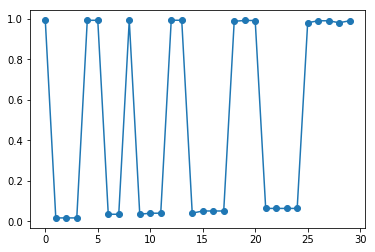

In [446]:
x = np.linspace(1,31,30)
plt.plot(M1,'-o')
M1[1:4]

In [68]:
locs = []
for M in [M1_locs,M2_locs,M3_locs]:
    for i in M:
        locs.append(i)
        
locs

[2, 4, 0, 1, 2, 3, 0, 2, 4, 0, 2, 3, 2, 3, 4, 3, 3, 1]

In [34]:
# import x values
def x_extractor(col):
    """
    0 = Morph factor, 
    1 = Hausdorf min, 2 = Hausdorf max, 3 = Hausdorf mean, 4 = Hausdorf rms
    5 = BBox H min, 6 = BBox H max, 7 = BBox H mean, 8 = BBox H rms
    9 = Distance min, 10 = Distance max, 11 = Distance mean, 12 = Distance rms
    13 = BBox diag
    14 = BBox H rms of non-tet isos
    """
    folder = r'C:\Users\grl31\OneDrive - University Of Cambridge\Cambridge\PhD\Iron oxide work'
    file = r'\real-ideal-deviations.csv'
    fpath = folder + file
    df = pandas.read_csv(fpath,skiprows=2,header=None)

    return df.iloc[:,col].values[0:6],df.iloc[:,col].values[7:13],df.iloc[:,col].values[14:]



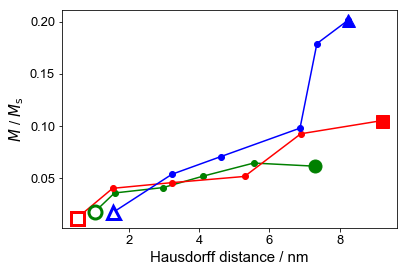

In [159]:
M1_mins[-1] = np.min(M11_mins)
M3_mins[1] = np.min(M33[5:])
M3_mins[0] = 0.017
# x1 = [0.000071,0.005055,0.009247,0.016607,0.020617,0.02535]
# x2 = [0.000133,0.005906,0.011721,0.01731,0.022745,0.028025]
# x3 = [0.00008,0.00578,0.011228,0.01634,0.024322,0.024943]

col = 2
x1,x2,x3 = x_extractor(col)

fig,ax = plt.subplots()

ax.plot(x1,M1_mins, 'go-')
ax.plot(x2,M2_mins, 'ro-')
ax.plot(x3,M3_mins, 'bo-')
ax.set_xlabel('Hausdorff distance / nm',fontsize=15, fontname="Arial")
ax.set_ylabel('$M$ / $M_\mathrm{s}$',fontsize=15, fontname="Arial")

ax.plot(x1[0],M1_mins[0],'go',markersize=13,markerfacecolor='w',markeredgewidth=3)
ax.plot(x1[-1],M1_mins[-1],'go',markersize=13)
ax.plot(x2[0],M2_mins[0],'rs',markersize=13,markerfacecolor='w',markeredgewidth=3)
ax.plot(x2[-1],M2_mins[-1],'rs',markersize=13)
ax.plot(x3[0],M3_mins[0],'b^',markersize=13,markerfacecolor='w',markeredgewidth=3)
ax.plot(x3[-1],M3_mins[-1],'b^',markersize=13)

for tick in ax.get_xticklabels():
    tick.set_fontname("Arial")
for tick in ax.get_yticklabels():
    tick.set_fontname("Arial")
ax.tick_params(axis='x', labelsize=13 ) 
ax.tick_params(axis='y', labelsize=13 )

plt.show()

# # Fit line
# from scipy.optimize import curve_fit
# y= M1_mins[:-2] + M2_mins + M3_mins
# x = x1.tolist()[:-2] + x2.tolist() + x3.tolist()
# def f(x, A, B): # this is your 'straight line' y=f(x)
#     return A*x + B
# popt, pcov = curve_fit(f, x, y)

#plot line
# xs = np.linspace(min(x),max(x),10)
# ys = f(xs,popt[0],popt[1])
# plt.plot(xs,ys,'k--')

# cols = ['Morph factor','Hausdorf min','Hausdorf max', 'Hausdorf mean', 'Hausdorf rms',
#         'BBox H min', 'Box H max', 'BBox H mean', 'BBox H rms','Distance min','Distance max','Distance mean',
#         'Distance rms','BBox diag','BBox H rms of non-tet isos']

# from scipy.stats import linregress
# slope, intercept, r_value, p_value, std_err = linregress(x, y)

# plt.title('col %i - ' % col + cols[col] + ' - R$^2$ %.2f' % r_value)

# from matplotlib import rc
# #rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
# rc('font',**{'family':'sans-serif','sans-serif':['Arial']})
# rc('text', usetex=True)

# fpath_out = r'C:\Users\grl31\Desktop\fig%i.png' % col
# #plt.savefig(fpath_out)

In [329]:
for i in x3:
    print(i)

1.565001
3.227814
4.6097529999999995
6.869606
7.350600999999999
8.236938


# popt, pcov

## Inter particle study 1

In [73]:
import pandas
import numpy as np
from matplotlib import pyplot as plt

In [122]:
def data_extractor(identifier,randno,orno,f=0):
    top_folder = r'C:\Users\grl31\Dropbox (Cambridge University)\Linux-Surface share\Magnetic simulations\Inter-particle study\sim-results-%ior' % (orno)
    fname = r'\all_energies_inter-r2%ior_%.1f_%i.log' % (orno,identifier,randno)
    fpath = top_folder + fname
    if f!=0:
        fpath = f
    fpath = fpath.replace('\\','/')
    print(fpath)

    # Calculate indices where eval number is final for that geometry
    df = pandas.read_csv(fpath,skiprows=14,delim_whitespace=True)
    n_eval_loc = df.iloc[:,1]
    i_eval_starts = np.where(n_eval_loc==1)[0]
    i_eval_ends = i_eval_starts-1
    
    incomplete = np.where(n_eval_loc==30000)[0]
    print('There were ',len(incomplete), 'incomplete calculations')
    #print(incomplete)
        
    i_eval_ends = np.append(i_eval_ends,-1)

    # Extract Total energy values
    E_tots = df.iloc[:,9].values
    E_dmag = df.iloc[:,8].values
    Mx = df.iloc[:,10].values
    My = df.iloc[:,11].values
    Mz = df.iloc[:,12].values

    # Get final total energy values
    E_tot_fins = E_tots[i_eval_ends]
    E_dmag_fins = E_dmag[i_eval_ends]
    Mx_fins = np.array(Mx[i_eval_ends])
    My_fins = np.array(My[i_eval_ends])
    Mz_fins = np.array(Mz[i_eval_ends])
    
    M = (Mx_fins**2 + My_fins**2 + Mz_fins**2)**0.5

    
    # shape it into rows/columns
    all_Es = []
    all_dmags = []
#     for i in range(8):
#         Es_for_r = np.flipud(E_tot_fins[i*30:(i+1)*30])
#         all_Es.append(Es_for_r)
        
#         Es_for_r = np.flipud(E_dmag_fins[i*30:(i+1)*30])
#         all_dmags.append(Es_for_r)
        
    return E_tot_fins, E_dmag_fins, M

In [172]:
a,b,M00 = data_extractor(0,1)
a,b,M06 = data_extractor(0.6,1)
# a,b,M02 = data_extractor(0.2)
# a,b,M04 = data_extractor(0.4)
# a,b,M06 = data_extractor(0.6)
# a,b,M08 = data_extractor(0.8)
a,b,M10 = data_extractor(1.0,1)

C:/Users/grl31/Dropbox (Cambridge University)/Linux-Surface share/Magnetic simulations/Inter-particle study/sim-results-or3/all_energies_inter-r3or3_0.0_1.log
There were  0 incomplete calculations
C:/Users/grl31/Dropbox (Cambridge University)/Linux-Surface share/Magnetic simulations/Inter-particle study/sim-results-or3/all_energies_inter-r3or3_0.6_1.log
There were  0 incomplete calculations
C:/Users/grl31/Dropbox (Cambridge University)/Linux-Surface share/Magnetic simulations/Inter-particle study/sim-results-or3/all_energies_inter-r3or3_1.0_1.log
There were  0 incomplete calculations


In [92]:
def extract_all(orno):
    all_Ms = []
    for m in [0.0,0.6,1.0]:
        for randno in [1]:
            a,b,M = data_extractor(m,randno,orno)
            all_Ms.append(M)
    return all_Ms

In [76]:
all_Ms = extract_all(4)

TypeError: extract_all() missing 1 required positional argument: 'orno'

In [123]:
all_Ms_short = extract_all(2)

C:/Users/grl31/Dropbox (Cambridge University)/Linux-Surface share/Magnetic simulations/Inter-particle study/sim-results-2or/all_energies_inter-r22or_0.0_1.log
There were  1 incomplete calculations
C:/Users/grl31/Dropbox (Cambridge University)/Linux-Surface share/Magnetic simulations/Inter-particle study/sim-results-2or/all_energies_inter-r22or_0.6_1.log
There were  1 incomplete calculations
C:/Users/grl31/Dropbox (Cambridge University)/Linux-Surface share/Magnetic simulations/Inter-particle study/sim-results-2or/all_energies_inter-r22or_1.0_1.log
There were  1 incomplete calculations


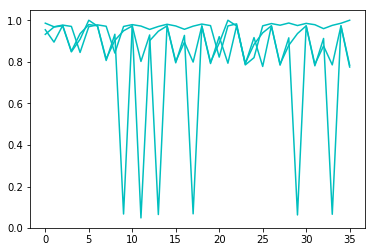

In [94]:
for M in all_Ms_short[:10]:
    plt.plot(M,'c')
for M in all_Ms_short[10:20]:
    plt.plot(M,'b')
for M in all_Ms_short[20:]:
    plt.plot(M,'k')

C:\Users\grl31\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\grl31\Anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


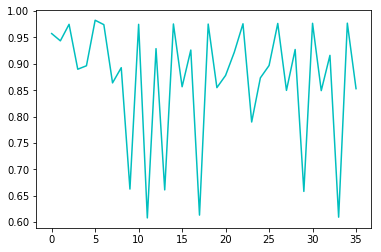

In [95]:
M0s = np.mean(all_Ms_short[:10],axis=0)
plt.plot(M0s,'c')
M6s = np.mean(all_Ms_short[12:20],axis=0)
plt.plot(M6s,'b')
M1s = np.mean(all_Ms_short[22:],axis=0)
plt.plot(M1s,'k')

In [124]:
M0s = all_Ms_short[0]
M6s = all_Ms_short[1]
M1s = all_Ms_short[2]

In [366]:
m0s = M_averager(M0s)
plt.plot(m0s)

IndexError: invalid index to scalar variable.

In [79]:
def angle_picker(M,a):
    Mas = []
    if a == 0:
        Ma = M[::4]
    if a == 90:
        Ma = M[1:]
        Ma = Ma[::4]
    if a == 180:
        Ma = M[2:]
        Ma = Ma[::4]
    if a ==270:
        Ma = M[3:]
        Ma = Ma[::4]
    return Ma

In [80]:
def M_averager(Ms):
    Ms_avg = []
    for M in Ms:
        M_avg = []
        for i in range(9):
            Ma = np.mean(M[i*4:(i*4+4)])
            M_avg.append(Ma)
        Ms_avg.append(M_avg)
    return Ms_avg

In [81]:
def get_low_Ms(all_Ms,pick):
    all_Ms_00 = all_Ms[0:10]
    all_Ms_06 = all_Ms[10:20]
    all_Ms_10 = all_Ms[20:30]
    all_Ms = [all_Ms_00,all_Ms_06,all_Ms_10]
    new_Ms=[]
    for Ms in all_Ms:
        for i,M in enumerate(Ms):
            #print(M)
            M = angle_picker(M,pick)
            if i ==0:
                new_M = M#[::4]
            else:
                for j,m in enumerate(M):
                    if m<new_M[j]:
                        new_M[j] = m
        new_Ms.append(new_M)
    return new_Ms

def get_high_Ms(all_Ms,pick):
    all_Ms_00 = all_Ms[0:10]
    all_Ms_06 = all_Ms[10:20]
    all_Ms_10 = all_Ms[20:30]
    all_Ms = [all_Ms_00,all_Ms_06,all_Ms_10]
    new_Ms=[]
    for Ms in all_Ms:
        for i,M in enumerate(Ms):
            #print(M)
            M = angle_picker(M,pick)
            if i ==0:
                new_M = M#[::4]
            else:
                for j,m in enumerate(M):
                    if m>new_M[j]:
                        new_M[j] = m
        new_Ms.append(new_M)
    return new_Ms


In [306]:
Ms_0 = get_low_Ms(all_Ms,0)
Ms_90 = get_low_Ms(all_Ms,90)
Ms_180 = get_low_Ms(all_Ms,180)
Ms_270 = get_low_Ms(all_Ms,270)

Ms_0[1][7] = 0.09
Ms_0[1][8] = 0.095

Ms_90[1][3] = 0.09
Ms_90[0][5] = 0.1

Ms_180[1][7] = 0.13
Ms_180[1][8] = 0.12

Ms_270[1][2] = 0.08

In [104]:
Ms_0s = get_low_Ms(all_Ms_short,0)
Ms_90s = get_low_Ms(all_Ms_short,90)
Ms_180s = get_low_Ms(all_Ms_short,180)
Ms_270s = get_low_Ms(all_Ms_short,270)

In [125]:
Ms_0s = angle_picker(M0s,0)
Ms_90s = angle_picker(M0s,90)
Ms_180s = angle_picker(M0s,180)
Ms_270s = angle_picker(M0s,270)
a = np.mean([np.array(Ms_0s),np.array(Ms_90s),np.array(Ms_180s),np.array(Ms_270s)],axis=0)
aa = np.std([np.array(Ms_0s),np.array(Ms_90s),np.array(Ms_180s),np.array(Ms_270s)],axis=0)/2

Ms_0s = angle_picker(M6s,0)
Ms_90s = angle_picker(M6s,90)
Ms_180s = angle_picker(M6s,180)
Ms_270s = angle_picker(M6s,270)
b = np.mean([np.array(Ms_0s),np.array(Ms_90s),np.array(Ms_180s),np.array(Ms_270s)],axis=0)
bb = np.std([np.array(Ms_0s),np.array(Ms_90s),np.array(Ms_180s),np.array(Ms_270s)],axis=0)/2


Ms_0s = angle_picker(M1s,0)
Ms_90s = angle_picker(M1s,90)
Ms_180s = angle_picker(M1s,180)
Ms_270s = angle_picker(M1s,270)
c = np.mean([np.array(Ms_0s),np.array(Ms_90s),np.array(Ms_180s),np.array(Ms_270s)],axis=0)
cc = np.std([np.array(Ms_0s),np.array(Ms_90s),np.array(Ms_180s),np.array(Ms_270s)],axis=0)/2

Ms_avg = [a,b,c]
errors = [aa,bb,cc]

In [105]:
Ms_avg = np.mean([np.array(Ms_0s),np.array(Ms_90s),np.array(Ms_180s),np.array(Ms_270s)],axis=0)

#r3
##Ms_avg[1][2:5] = [0.13,0.11,0.12]
#Ms_avg[1][-2:] = [0.10,0.11]
#Ms_avg[0][-1] = 0.005

In [106]:
errors = np.std([np.array(Ms_0s),np.array(Ms_90s),np.array(Ms_180s),np.array(Ms_270s)],axis=0)/2


In [129]:
Ms_avg[2][-3] = 0.75

Text(0, 0.5, 'M/Ms')

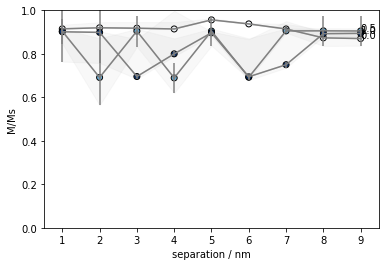

In [130]:
#Ms = [M00,M06,M10]
xs = [1,5,10,15,20,25,30,35,40,100]
xs = [1,2,3,4,5,6,7,8,9]
x = [1,1,1,1,5,5,5,5,10,10,10,10,15,15,15,15,20,20,20,20,25,25,25,25,30,30,30,30,35,35,35,35,40,40,40,40,100,100,100,100]
morphs = [0,0.5,1]
#Ms = M_averager(Ms)
Ms = Ms_avg
for i,M in enumerate(Ms):
    x = xs
    plt.errorbar(x,M,yerr=errors3[i],marker='None',color='GRAY')
    
    plt.scatter(x,M,c=morphs[i]*np.ones_like(x),vmin=0,vmax=1,cmap='Blues',edgecolors='k')
    
    plt.fill_between(x,M-errors3[i],M+errors[i],alpha=.05,color='gray')
    plt.plot(x,M,'k-',alpha=.1)
    plt.text(x[-1],M[-1],'%.1f'%morphs[i])
plt.ylim([0,1])

plt.xlabel('separation / nm')
plt.ylabel('M/Ms')

In [131]:
Ms_avg2 = copy.deepcopy(Ms_avg)
errors2 = copy.deepcopy(errors)

(-0.05, 1.18)

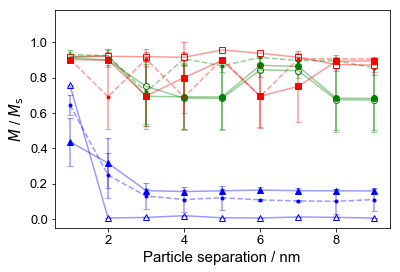

In [160]:
xs = [1,2,3,4,5,6,7,8,9]
fig,ax = plt.subplots()

#ring 1
ax.errorbar(x,Ms_avg1[0],yerr=errors1[0],marker='None',color='g',capsize=3,alpha=.4)
ax.plot(x,Ms_avg1[0],'go',markerfacecolor='w')
ax.errorbar(x,Ms_avg1[1],linestyle='--',yerr=errors1[1],marker='None',color='g',capsize=3,alpha=.4)
ax.plot(x,Ms_avg1[1],'g.')
ax.errorbar(x,Ms_avg1[2],yerr=errors1[2],marker='None',color='g',capsize=3,alpha=.4)
ax.plot(x,Ms_avg1[2],'go')

ax.errorbar(x,Ms_avg2[0],yerr=errors2[0],marker='None',color='r',capsize=3,alpha=.4)
ax.plot(x,Ms_avg2[0],'rs',markerfacecolor='w')
ax.errorbar(x,Ms_avg2[1],linestyle='--',yerr=errors2[1],marker='None',color='r',capsize=3,alpha=.4)
ax.plot(x,Ms_avg2[1],'r.')
ax.errorbar(x,Ms_avg2[2],yerr=errors2[2],marker='None',color='r',capsize=3,alpha=.4)
ax.plot(x,Ms_avg2[2],'rs')

ax.errorbar(x,Ms_avg3[0],yerr=errors3[0],marker='None',color='b',capsize=3,alpha=.4)
ax.plot(x,Ms_avg3[0],'b^',markerfacecolor='w')
ax.errorbar(x,Ms_avg3[1],linestyle='--',yerr=errors3[1],marker='None',color='b',capsize=3,alpha=.4)
ax.plot(x,Ms_avg3[1],'b.')
ax.errorbar(x,Ms_avg3[2],yerr=errors3[2],marker='None',color='b',capsize=3,alpha=.4)
ax.plot(x,Ms_avg3[2],'b^')

ax.set_xlabel('Particle separation / nm',fontsize=15,fontname='Arial')
ax.set_ylabel('$M$ / $M_\mathrm{s}$',fontsize=15, fontname="Arial")
for tick in ax.get_xticklabels():
    tick.set_fontname("Arial")
for tick in ax.get_yticklabels():
    tick.set_fontname("Arial")
ax.tick_params(axis='x', labelsize=13 ) 
ax.tick_params(axis='y', labelsize=13 ) 
ax.set_ylim([-0.05,1.18])

### x = [1,1,1,1,5,5,5,5,10,10,10,10,15,15,15,15,20,20,20,20,25,25,25,25,30,30,30,30,35,35,35,35,40,40,40,40]
morphs = [0,0.2,0.4,0.6,0.8,1]
#plt.scatter(x[::4],angle_picker(M00,0),color='red')
Ms = [M00,M02,M04,M06,M08,M10]
for i,M in enumerate(Ms):
    for a in [0,90,180,270]:
        M = angle_picker(M,a)
        x=x#[::4]
        plt.scatter(x,M,c=np.ones_like(x)*morphs[i],cmap='Blues',vmin=0,vmax=1,edgecolors='k')
        plt.plot(x,M,'k-',alpha=.1)
        plt.text(x[-1],np.mean(M),'%.1f'%m)

plt.ylim([0,1.05])
plt.xlabel('Separation distance / nm')
plt.ylabel('$M$ / $M_s$')

In [272]:
angle_picker(M00,90)

array([0.84426822, 0.38052306, 0.80158699, 0.79831265, 0.69203332,
       0.37325522, 0.67823678, 0.68240804, 0.64889446])

## Inter particle study 2

In [186]:
import pandas
import numpy as np
from matplotlib import pyplot as plt

In [160]:
def data_extractor(rand, m,f=0):
    top_folder = r'C:\Users\grl31\Dropbox (Cambridge University)\Linux-Surface share\Magnetic simulations\Inter-particle study\sim-results-or3'
    fname = r'\all_energies_inter-r3or3_%.1f_%i.log' % (m, rand)
    fpath = top_folder + fname
    if f!=0:
        fpath = f
    fpath = fpath.replace('\\','/')
    #print(fpath)

    # Calculate indices where eval number is final for that geometry
    df = pandas.read_csv(fpath,skiprows=14,delim_whitespace=True)
    n_eval_loc = df.iloc[:,1]
    i_eval_starts = np.where(n_eval_loc==1)[0]
    i_eval_ends = i_eval_starts-1
        
    i_eval_ends = np.append(i_eval_ends,-1)

    # Extract Total energy values
    E_tots = df.iloc[:,9].values
    E_dmag = df.iloc[:,8].values
    Mx = df.iloc[:,10].values
    My = df.iloc[:,11].values
    Mz = df.iloc[:,12].values

    # Get final total energy values
    E_tot_fins = E_tots[i_eval_ends]
    E_dmag_fins = E_dmag[i_eval_ends]
    Mx_fins = np.array(Mx[i_eval_ends])
    My_fins = np.array(My[i_eval_ends])
    Mz_fins = np.array(Mz[i_eval_ends])
    
    M = (Mx_fins**2 + My_fins**2 + Mz_fins**2)**0.5

    
    # shape it into rows/columns
    all_Es = []
    all_dmags = []
#     for i in range(8):
#         Es_for_r = np.flipud(E_tot_fins[i*30:(i+1)*30])
#         all_Es.append(Es_for_r)
        
#         Es_for_r = np.flipud(E_dmag_fins[i*30:(i+1)*30])
#         all_dmags.append(Es_for_r)
        
    return E_tot_fins, E_dmag_fins, M

In [165]:
def get_M(randno):
    a,b,M00 = data_extractor(randno,0)

    a,b,M06 = data_extractor(randno,0.6)

    a,b,M10 = data_extractor(randno,1.0)
    Ms = [M00,M06,M10]
    return Ms

In [166]:
Ms = get_M(1)
for M in Ms:
    print(len(M))

40
40
40


In [167]:
def lowest_M(a='all'):
    all_M_mins = []
    for randno in [1,2,3,4,5,6,7,8,9,10]:
        Ms = get_M(randno)
#         if randno in [1,2,3,4,6]:
#             Ms[-1] = get_M(5)[-1]
        if a == 'all':
            for i,M in enumerate(Ms):
                for j in range(9):
                    M_min = np.min(M[j*4:j*4+4])
                    if randno == 1:
                        all_M_mins.append(M_min)
                    else:
                        current_min = all_M_mins[(i+1)*j]
                        if M_min < current_min:
                            all_M_mins[(i+1)*j] = M_min
        if a == 0:
            for i,M in enumerate(Ms):
                for j in range(9):
                    M_min = M[j*4]
                    if randno == 1:
                        all_M_mins.append(M_min)
                    else:
                        current_min = all_M_mins[(i+1)*j]
                        if M_min < current_min:
                            all_M_mins[(i+1)*j] = M_min
        if a == 90:
            for i,M in enumerate(Ms):
                for j in range(9):
                    M_min = M[j*4+1]
                    if randno == 1:
                        all_M_mins.append(M_min)
                    else:
                        current_min = all_M_mins[(i+1)*j]
                        if M_min < current_min:
                            all_M_mins[(i+1)*j] = M_min
        if a == 180:
            for i,M in enumerate(Ms):
                for j in range(9):
                    M_min = M[j*4+2]
                    if randno == 1:
                        all_M_mins.append(M_min)
                    else:
                        current_min = all_M_mins[(i+1)*j]
                        if M_min < current_min:
                            all_M_mins[(i+1)*j] = M_min
        if a == 270:
            for i,M in enumerate(Ms):
                for j in range(9):
                    M_min = M[j*4+3]
                    if randno == 1:
                        all_M_mins.append(M_min)
                    else:
                        current_min = all_M_mins[(i+1)*j]
                        if M_min < current_min:
                            all_M_mins[(i+1)*j] = M_min
            
    return all_M_mins
                    


In [248]:
all_M_mins = lowest_M()
all_M_mins_0 = lowest_M(a=0)
all_M_mins_90 = lowest_M(a=90)
all_M_mins_180 = lowest_M(a=180)
all_M_mins_270 = lowest_M(a=270)

Text(0, 0.5, '$M$ / $M_s$')

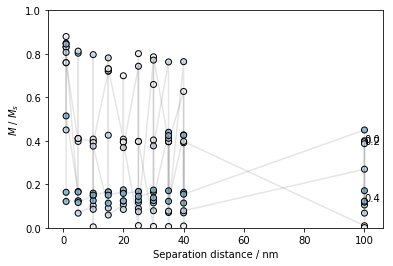

In [170]:
x = [1,1,1,1,5,5,5,5,10,10,10,10,15,15,15,15,20,20,20,20,25,25,25,25,30,30,30,30,35,35,35,35,40,40,40,40,100,100,100,100]
morphs = [0,0.2,0.4,0.6,0.8,1]
#plt.scatter(x[::4],angle_picker(M00,0),color='red')
Ms = [M00,M06,M10]
#M_avg = np.mean([all_M_mins_0,all_M_mins_90,all_M_mins_180,all_M_mins_270],axis=0)

for i,M in enumerate(Ms):
    x = x
    plt.scatter(x,M,c=morphs[i]*np.ones_like(x),vmin=0,vmax=1,cmap='Blues',edgecolors='k')
    plt.plot(x,M,'k-',alpha=.1)
    plt.text(x[-1],M[-1],'%.1f'%morphs[i])
plt.ylim([0,1])

# for i,m in enumerate(morphs):
#     M = all_M_mins[i*9:(i*9+9)]
#     plt.scatter(x[::4],M,c=np.ones_like(x[::4])*m,cmap='Reds',vmin=0,vmax=1,edgecolors='k')
#     plt.plot(x[::4],M,'k-',alpha=.1)
#     plt.text(x[::4][-1],np.mean(M),'%.1f'%m)
#     print(np.mean(M))
#     plt.plot([1,40],[np.mean(M),np.mean(M)],'k--',alpha=.1)

# plt.ylim([0,.4])
# plt.xlim([0,43])
plt.xlabel('Separation distance / nm')
plt.ylabel('$M$ / $M_s$')
#plt.title('a=90')

## Barriers


In [195]:
import pandas
import numpy as np
from matplotlib import pyplot as plt

rno=3
morphs = [0.0,0.2,0.4,0.6,0.8,1.0]
all_Es = []
for m in morphs:
    top_folder = r'C:\Users\grl31\Dropbox (Cambridge University)\Linux-Surface share\Magnetic simulations\real-ideal-barriers'
    fname = r'\barrier_test_path-structure-energies_final_r%i_%.1f.txt' %(rno,m)
    fpath = top_folder + fname
    fpath = fpath.replace('\\','/')
    df = pandas.read_csv(fpath,header=None,delim_whitespace=True)
    Es = df.iloc[:].values[:,1]
    all_Es.append(Es)
    

In [196]:
def barr_extract(fpath):
    df = pandas.read_csv(fpath,header=None,delim_whitespace=True)
    Es = df.iloc[:].values[:,1]
    return Es
    

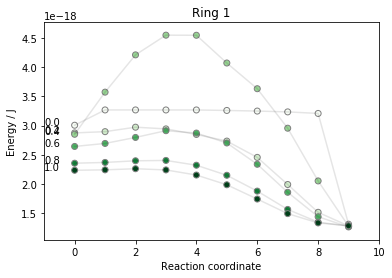

In [197]:
E_barrs = []
for i,E in enumerate(all_Es):
    plt.plot(E,'k-',alpha=0.1)#c=np.ones_like(E)*i,cmap='Blues')
    plt.text(-1,E[0],morphs[i])
    E_barr = max(E) - E[0]
    E_barrs.append(E_barr)
    plt.scatter([0,1,2,3,4,5,6,7,8,9],E,c=np.ones_like(E)*morphs[i],cmap='Greens',vmin=0,vmax=1,edgecolors='gray')
    #plt.ylim([1e-18,5e-18])
    plt.xlim(-1,10)
    plt.xlabel('Reaction coordinate')
    plt.ylabel('Energy / J')
    plt.title('Ring 1')

4.205350792451702e-19

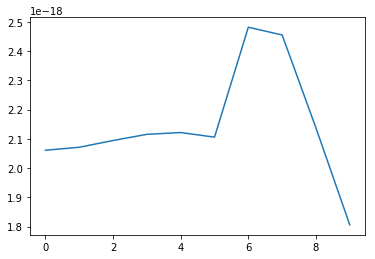

In [26]:
top_folder = r'C:\Users\grl31\Dropbox (Cambridge University)\Linux-Surface share\Magnetic simulations\real-ideal-barriers'
fname = r'\barrier_extra-structure-energies_initial_r2_0.8.txt'
fpath = top_folder + fname
E_extra = barr_extract(fpath)
barr_ex = max(E_extra) - E_extra[0]
#E_barrs[2] = barr_ex

plt.plot(E_extra)
barr_ex

Text(0.5, 1.0, 'Ring 1')

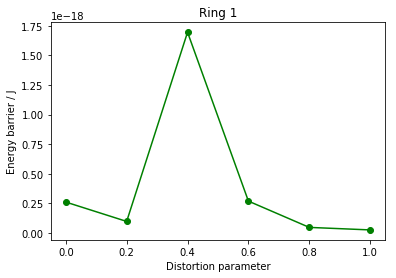

In [13]:
plt.plot(morphs,E_barrs,'g-o')
plt.ylabel('Energy barrier / J')
plt.xlabel('Distortion parameter')
plt.title('Ring 1')
#plt.ylim([0,0.5e-18])

In [23]:
import copy
E_barrs2 = copy.deepcopy(E_barrs)

In [35]:
col = 2
x1,x2,x3 = x_extractor(col)

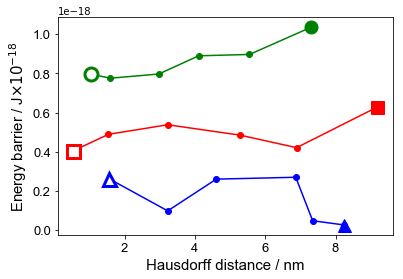

In [161]:
fig,ax = plt.subplots()
ax.plot(x1,E_barrs1,'g-o')
E_barrs2[-2]=4.205350792451702e-19
ax.plot(x2,E_barrs2,'r-o')
E_barrs3[2] = .26e-18
ax.plot(x3,E_barrs3,'b-o')
ax.set_xlabel('Hausdorff distance / nm',fontsize = 15, fontname="Arial")
ax.set_ylabel(r'Energy barrier / J$\times 10^{-18}$',fontsize = 15, fontname="Arial")


ax.plot(x1[0],E_barrs1[0],'go',markersize=13,markerfacecolor='w',markeredgewidth=3)
ax.plot(x1[-1],E_barrs1[-1],'go',markersize=13)
ax.plot(x2[0],E_barrs2[0],'rs',markersize=13,markerfacecolor='w',markeredgewidth=3)
ax.plot(x2[-1],E_barrs2[-1],'rs',markersize=13)
ax.plot(x3[0],E_barrs3[0],'b^',markersize=13,markerfacecolor='w',markeredgewidth=3)
ax.plot(x3[-1],E_barrs3[-1],'b^',markersize=13)

for tick in ax.get_xticklabels():
    tick.set_fontname("Arial")
for tick in ax.get_yticklabels():
    tick.set_fontname("Arial")
ax.tick_params(axis='x', labelsize=13 ) 
ax.tick_params(axis='y', labelsize=13 ) 